# 2022 Australian Grand Prix Analysis

In [1]:
# !jt -t grade3 -T -f liberation -tf loraserif -fs 11 -ofs 10 -dfs 10 -tfs 11 -lineh 150 -cursw 3 -cursc r -cellw 100%

In [2]:
# !jt -t gruvboxd -T -f liberation -tf loraserif -fs 11 -ofs 10 -dfs 11 -tfs 11 -lineh 150 -cursw 3 -cursc r -cellw 100%

In [3]:
import fastf1 as ff1
from fastf1 import plotting
ff1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme='fastf1', misc_mpl_mods=True)
from fastf1 import utils
from fastf1.core import Laps
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import datetime
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from timple.timedelta import strftimedelta
plotting.setup_mpl()
ff1.Cache.enable_cache('C:/Users/EDGAR/Jupyter Files/FastF1Cache')

## Qualifying Analysis

In [4]:
year=2022
circuit='Australian Grand Prix'
quali=ff1.get_session(year,circuit,'Q')
quali.load()
laps=quali.load_laps()

utils          INFO 	Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
utils          INFO 	NumExpr defaulting to 8 threads.
core           INFO 	Loading data for Australian Grand Prix - Qualifying [v2.2.7]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '11', '4', '44', '63', '3', '31', '55', '14', '10', '77', '22', '24', '47', '23', '20', '5', '6', '18']
C

In [5]:
laps2=pd.DataFrame(quali.laps)
# quali.results[['Q3','LastName']]

In [6]:
#Aggregating the two DataFrames into one, to be easier to work with.
results=pd.DataFrame(quali.results)
fsq=laps2.copy()
fsq=pd.merge(fsq,results,on='DriverNumber',how='outer')
fsq=fsq.drop(['Time_y','Status','Points','GridPosition'],axis=1)
fsq=fsq.rename(columns={'Time_x':'Time'})
fsq

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,Q1,Q2,Q3
0,0 days 00:17:24.398000,16,0 days 00:01:52.575000,1,1,0 days 00:15:34.589000,NaT,0 days 00:00:46.045000,0 days 00:00:23.979000,0 days 00:00:42.551000,0 days 00:16:17.952000,0 days 00:16:41.909000,0 days 00:17:24.479000,221.0,264.0,296.0,311.0,False,SOFT,1.0,True,0 days 00:15:34.589000,Ferrari,LEC,1,False,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,1.0,0 days 00:01:18.881000,0 days 00:01:18.606000,0 days 00:01:17.868000
1,0 days 00:18:43.789000,16,0 days 00:01:19.391000,2,1,NaT,NaT,0 days 00:00:27.539000,0 days 00:00:17.955000,0 days 00:00:33.897000,0 days 00:17:51.937000,0 days 00:18:09.892000,0 days 00:18:43.789000,281.0,302.0,299.0,246.0,False,SOFT,2.0,True,0 days 00:17:24.398000,Ferrari,LEC,1,True,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,1.0,0 days 00:01:18.881000,0 days 00:01:18.606000,0 days 00:01:17.868000
2,0 days 00:20:56.527000,16,0 days 00:02:12.738000,3,1,NaT,NaT,0 days 00:00:47.316000,0 days 00:00:35.204000,0 days 00:00:50.218000,0 days 00:19:31.105000,0 days 00:20:06.309000,0 days 00:20:56.527000,150.0,162.0,296.0,310.0,False,SOFT,3.0,True,0 days 00:18:43.789000,Ferrari,LEC,2,True,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,1.0,0 days 00:01:18.881000,0 days 00:01:18.606000,0 days 00:01:17.868000
3,0 days 00:22:15.408000,16,0 days 00:01:18.881000,4,1,NaT,NaT,0 days 00:00:27.152000,0 days 00:00:17.935000,0 days 00:00:33.794000,0 days 00:21:23.679000,0 days 00:21:41.614000,0 days 00:22:15.408000,283.0,301.0,298.0,284.0,False,SOFT,4.0,True,0 days 00:20:56.527000,Ferrari,LEC,2,True,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,1.0,0 days 00:01:18.881000,0 days 00:01:18.606000,0 days 00:01:17.868000
4,0 days 00:59:17.570000,16,NaT,5,2,NaT,0 days 00:24:27.236000,0 days 00:00:47.847000,0 days 00:00:33.701000,NaT,0 days 00:23:03.320000,0 days 00:23:37.045000,NaT,129.0,179.0,NaN,NaN,False,SOFT,1.0,True,0 days 00:22:15.408000,Ferrari,LEC,52,False,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,1.0,0 days 00:01:18.881000,0 days 00:01:18.606000,0 days 00:01:17.868000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,0 days 00:28:43.082000,6,0 days 00:01:56.135000,6,2,0 days 00:26:48.927000,NaT,0 days 00:00:37.840000,0 days 00:00:19.678000,0 days 00:00:58.617000,0 days 00:27:24.787000,0 days 00:27:44.465000,0 days 00:28:43.082000,264.0,285.0,300.0,318.0,False,SOFT,2.0,True,0 days 00:26:46.947000,Williams,LAT,1,False,N LATIFI,LAT,Williams,37bedd,Nicholas,Latifi,Nicholas Latifi,19.0,0 days 00:01:21.372000,NaT,NaT
335,0 days 00:30:06.652000,6,0 days 00:01:23.570000,7,2,NaT,NaT,0 days 00:00:27.536000,0 days 00:00:18.198000,0 days 00:00:37.836000,0 days 00:29:10.618000,0 days 00:29:28.816000,0 days 00:30:06.652000,281.0,300.0,271.0,250.0,False,SOFT,3.0,True,0 days 00:28:43.082000,Williams,LAT,1,True,N LATIFI,LAT,Williams,37bedd,Nicholas,Latifi,Nicholas Latifi,19.0,0 days 00:01:21.372000,NaT,NaT
336,0 days 00:43:01.773000,6,NaT,8,2,NaT,0 days 00:43:01.773000,0 days 00:00:48.789000,0 days 00:00:18.198000,NaT,0 days 00:30:55.499000,0 days 00:43:01.773000,NaT,147.0,NaN,NaN,NaN,False,SOFT,4.0,True,0 days 00:30:06.652000,Williams,LAT,5,False,N LATIFI,LAT,Williams,37bedd,Nicholas,Latifi,Nicholas Latifi,19.0,0 days 00:01:21.372000,NaT,NaT
337,0 days 00:30:21.074000,18,0 days 00:01:46.833000,1,1,0 days 00:28:36.218000,NaT,0 days 00:00:43.939000,0 days 00:00:20.806000,0 days 00:00:42.088000,0 days 00:29:18.180000,0 days 00:29:39.006000,0 days 00:30:21.244000,156.0,282.0,296.0,311.0,False,SOFT

### Fastest Sectors in Qualifying

In [7]:
s3=fsq.loc[fsq['Sector3Time']==min(fsq['Sector3Time'].dropna()),['LapTime','Driver','Sector1Time','Sector2Time','Sector3Time','LapNumber']]
s2=fsq.loc[fsq['Sector2Time']==min(fsq['Sector2Time'].dropna()),['LapTime','Driver','Sector1Time','Sector2Time','Sector3Time','LapNumber']]
s1=fsq.loc[fsq['Sector1Time']==min(fsq['Sector1Time'].dropna()),['LapTime','Driver','Sector1Time','Sector2Time','Sector3Time','LapNumber']]
s123=pd.concat([s1,s2,s3],ignore_index=True)
s123

,LapTime,Driver,Sector1Time,Sector2Time,Sector3Time,LapNumber
0,0 days 00:01:17.868000,LEC,0 days 00:00:26.740000,0 days 00:00:17.786000,0 days 00:00:33.342000,20
1,NaT,ALO,0 days 00:00:26.856000,0 days 00:00:17.753000,0 days 00:00:39.338000,15
2,0 days 00:01:17.868000,LEC,0 days 00:00:26.740000,0 days 00:00:17.786000,0 days 00:00:33.342000,20
3,NaT,LEC,0 days 00:00:38.715000,0 days 00:00:25.347000,0 days 00:00:33.342000,21


### Fastest Laps in Q1, Q2, Q3

In [8]:
flq1=fsq.loc[fsq['LapTime'] == min(fsq['Q1'].dropna())]
flq2=fsq.loc[fsq['LapTime'] == min(fsq['Q2'].dropna())]
flq3=fsq.loc[fsq['LapTime'] == min(fsq['Q3'].dropna())]
flqs=pd.concat([flq1,flq2,flq3],ignore_index=True)
flqs[['Driver','Team','Compound','Q1','Q2','Q3']]

,Driver,Team,Compound,Q1,Q2,Q3
0,VER,Red Bull Racing,SOFT,0 days 00:01:18.580000,0 days 00:01:18.611000,0 days 00:01:18.154000
1,PER,Red Bull Racing,SOFT,0 days 00:01:18.834000,0 days 00:01:18.340000,0 days 00:01:18.240000
2,LEC,Ferrari,SOFT,0 days 00:01:18.881000,0 days 00:01:18.606000,0 days 00:01:17.868000


### Minisector Comparison Between Top 4 Qualifying Drivers

#### Who are the top 4 qualifying drivers?

In [9]:
quali.results[:4]
#, Leclerc,Verstappen,Perez,Norris<

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,1.0,0.0,0 days 00:01:18.881000,0 days 00:01:18.606000,0 days 00:01:17.868000,NaT,,0.0
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,2.0,0.0,0 days 00:01:18.580000,0 days 00:01:18.611000,0 days 00:01:18.154000,NaT,,0.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,3.0,0.0,0 days 00:01:18.834000,0 days 00:01:18.340000,0 days 00:01:18.240000,NaT,,0.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,4.0,0.0,0 days 00:01:19.280000,0 days 00:01:19.066000,0 days 00:01:18.703000,NaT,,0.0


In [10]:
#Getting the laps from all 4 drivers
llec=laps.pick_driver('LEC')
lver=laps.pick_driver('VER')
lnor=laps.pick_driver('NOR')
lper=laps.pick_driver('PER')
#Getting telemetry data from drivers
flec=llec.pick_fastest().get_telemetry().add_distance()
fver=lver.pick_fastest().get_telemetry().add_distance()
fnor=lnor.pick_fastest().get_telemetry().add_distance()
fper=lper.pick_fastest().get_telemetry().add_distance()
#Creating Driver column
flec['Driver']='LEC'
fver['Driver']='VER'
fnor['Driver']='NOR'
fper['Driver']='PER'
#Getting everything in one dataframe
t1=flec.append(fver)
t2=t1.append(fnor)
telemetry=t2.append(fper)

In [11]:
# telemetry

In [12]:
#Creating the minisectors (doing 30 - 10 per sector)
nmini=30
#Grabbing circuit distance
cdist=max(telemetry['Distance'])
#Dividing circuit distance by number of minisectors to have our minisector distance
minilen=cdist/nmini
#Calculating distances at which the next minisector begins
minis=[0]
for b in range(0,(nmini-1)):
    minis.append(minilen*(b+1))
#Assigning every row in the dataset to a minisector, so we always know which minisector the cars were located in.
telemetry['Minisector']=telemetry['Distance'].apply(
    lambda dist:(
        int((dist // minilen)+1)))

In [13]:
#Finding the fastest driver per minisector so we can color it in the minisector map
avgspeed=telemetry.groupby(['Minisector','Driver'])['Speed'].mean().reset_index()
fastest = avgspeed.loc[avgspeed.groupby(['Minisector'])['Speed'].idxmax()]
fastest = fastest[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_Driver'})

In [14]:
fastest['Fastest_Driver'].unique()
#3 drivers had a fastest minisector
# fastest['Fastest_Driver']=='LEC'

array(['PER', 'LEC', 'VER'], dtype=object)

In [15]:
# Fastest driver per minisector + telemetry
telemetry = telemetry.merge(fastest, on=['Minisector'])

# Ordering by distance
telemetry = telemetry.sort_values(by=['Distance'])

# Converting driver name to integer
telemetry.loc[telemetry['Fastest_Driver'] == 'PER', 'Fastest_Driver_int'] = 3
telemetry.loc[telemetry['Fastest_Driver'] == 'VER', 'Fastest_Driver_int'] = 2
telemetry.loc[telemetry['Fastest_Driver'] == 'LEC', 'Fastest_Driver_int'] = 1
# telemetry.loc[telemetry['Fastest_Driver'] == 'PER', 'Fastest_Driver_int'] = 3

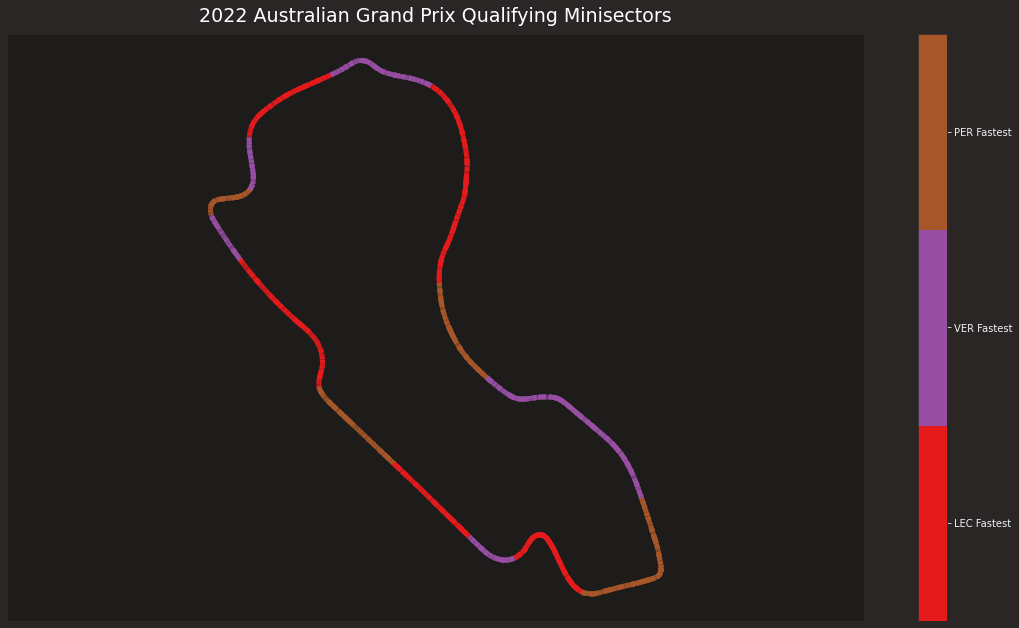

In [16]:
# Finally, plotting.
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_Driver_int'].to_numpy().astype(float)

cmap = cm.get_cmap('Set1', 4)
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

# plt.rcParams['figure.figsize'] = [18, 10]
plt.gcf().set_size_inches(19.2,10.8)
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.title(f'{year} {circuit} Qualifying Minisectors',color='white')
cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1,5))
cbar.set_ticks(np.arange(1.5,4.5))
cbar.set_ticklabels(['LEC Fastest', 'VER Fastest','PER Fastest'])

plt.savefig(f"{year} {circuit} Qualifying Minisectors.jpeg", dpi=100)

plt.show()

### Qualifying Time Difference Graph

In [17]:
#Getting every driver
drv = pd.unique(quali.laps['Driver'])
drv=np.array(drv)
drv

array(['LEC', 'VER', 'PER', 'NOR', 'HAM', 'RUS', 'RIC', 'OCO', 'SAI',
       'ALO', 'GAS', 'BOT', 'TSU', 'ZHO', 'MSC', 'ALB', 'MAG', 'VET',
       'LAT', 'STR'], dtype=object)

In [18]:
#Sorting laps by LapTime
fl_list= list()
for d in drv:
    drv_fl = quali.laps.pick_driver(d).pick_fastest()
    fl_list.append(drv_fl)
fl = Laps(fl_list).sort_values(by='LapTime').reset_index(drop=True)

In [19]:
#getting the fastest lap
pole=fl.pick_fastest()
fl['LapTimeDiff']=fl['LapTime']-pole['LapTime']
# print(fl[['Driver', 'LapTime', 'LapTimeDiff']])
fl=fl.drop(index=19)
print(fl[['Driver', 'LapTime', 'LapTimeDiff']])

   Driver                LapTime            LapTimeDiff
0     LEC 0 days 00:01:17.868000        0 days 00:00:00
1     VER 0 days 00:01:18.154000 0 days 00:00:00.286000
2     PER 0 days 00:01:18.240000 0 days 00:00:00.372000
3     NOR 0 days 00:01:18.703000 0 days 00:00:00.835000
4     ALO 0 days 00:01:18.815000 0 days 00:00:00.947000
5     HAM 0 days 00:01:18.825000 0 days 00:00:00.957000
6     RUS 0 days 00:01:18.933000 0 days 00:00:01.065000
7     RIC 0 days 00:01:19.032000 0 days 00:00:01.164000
8     OCO 0 days 00:01:19.061000 0 days 00:00:01.193000
9     GAS 0 days 00:01:19.226000 0 days 00:00:01.358000
10    SAI 0 days 00:01:19.408000 0 days 00:00:01.540000
11    BOT 0 days 00:01:19.410000 0 days 00:00:01.542000
12    TSU 0 days 00:01:19.424000 0 days 00:00:01.556000
13    ALB 0 days 00:01:20.135000 0 days 00:00:02.267000
14    ZHO 0 days 00:01:20.155000 0 days 00:00:02.287000
15    MAG 0 days 00:01:20.254000 0 days 00:00:02.386000
16    MSC 0 days 00:01:20.465000 0 days 00:00:02

In [20]:
#creating a list of team colors for the graph
tcol = list()
for index, lap in fl.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
#     print(lap['Team'])
    tcol.append(color)

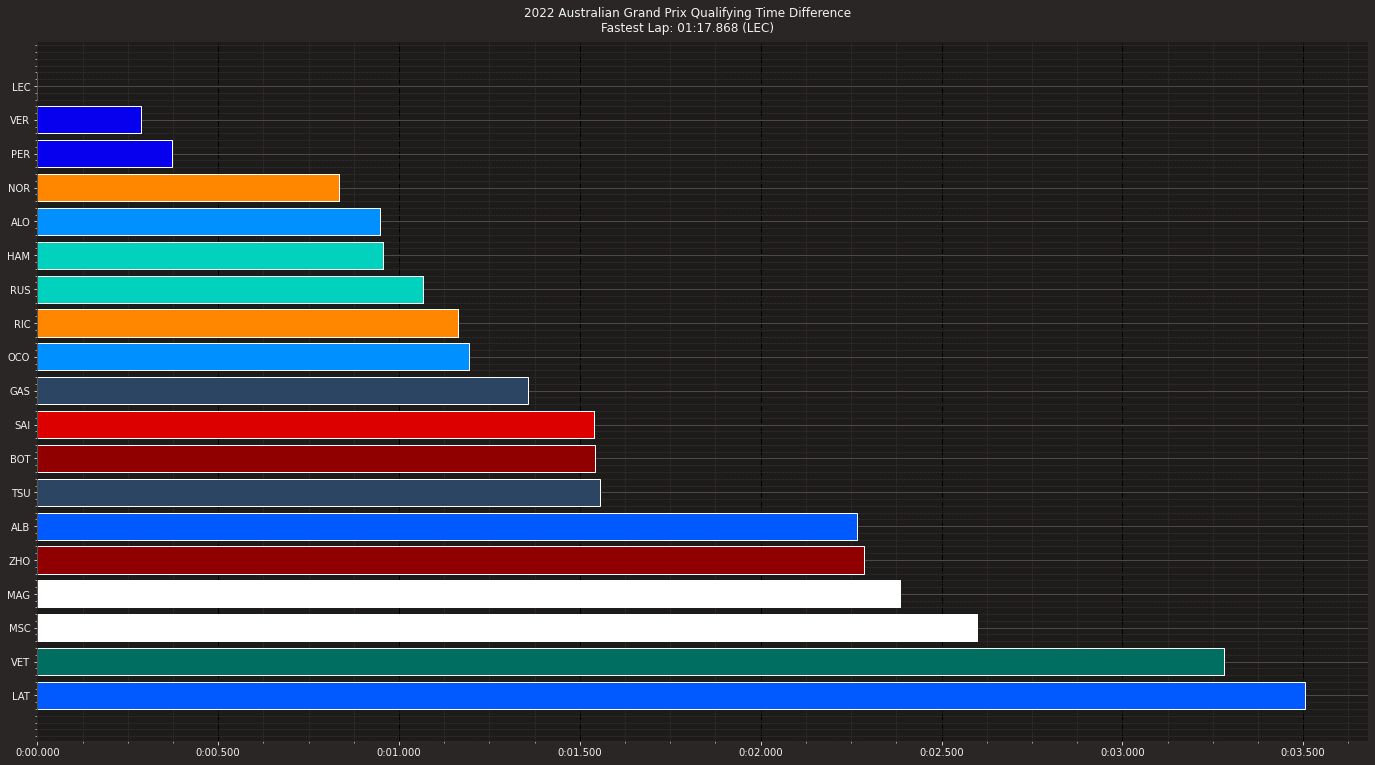

In [21]:
#Finally, plotting and titling
fig, ax = plt.subplots(tight_layout=True)
plt.gcf().set_size_inches(19.2,10.8)
ax.barh(fl.index, fl['LapTimeDiff'],color=tcol, edgecolor='white')
ax.set_yticks(fl.index)
ax.set_yticklabels(fl['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='-.', color='black', zorder=-1000)
lapstr = strftimedelta(pole['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{year} {circuit} Qualifying Time Difference\n"
             f"Fastest Lap: {lapstr} ({pole['Driver']})")
plt.savefig(f"{year} {circuit} Qualifying Time Difference.jpeg", dpi=100)

plt.show()

### Qualifying Speed Over Distance Analysis - Top 4 Drivers

In [22]:
#Getting the laps from all 4 drivers
llec=laps.pick_driver('LEC')
lver=laps.pick_driver('VER')
lnor=laps.pick_driver('NOR')
lper=laps.pick_driver('PER')
#Getting telemetry data from drivers
flec=llec.pick_fastest().get_telemetry().add_distance()
fver=lver.pick_fastest().get_telemetry().add_distance()
fnor=lnor.pick_fastest().get_telemetry().add_distance()
fper=lper.pick_fastest().get_telemetry().add_distance()
#Creating Driver column
flec['Driver']='LEC'
fver['Driver']='VER'
fnor['Driver']='NOR'
fper['Driver']='PER'
#Getting everything in one dataframe
t1=flec.append(fver)
t2=t1.append(fnor)
telemetry=t2.append(fper)

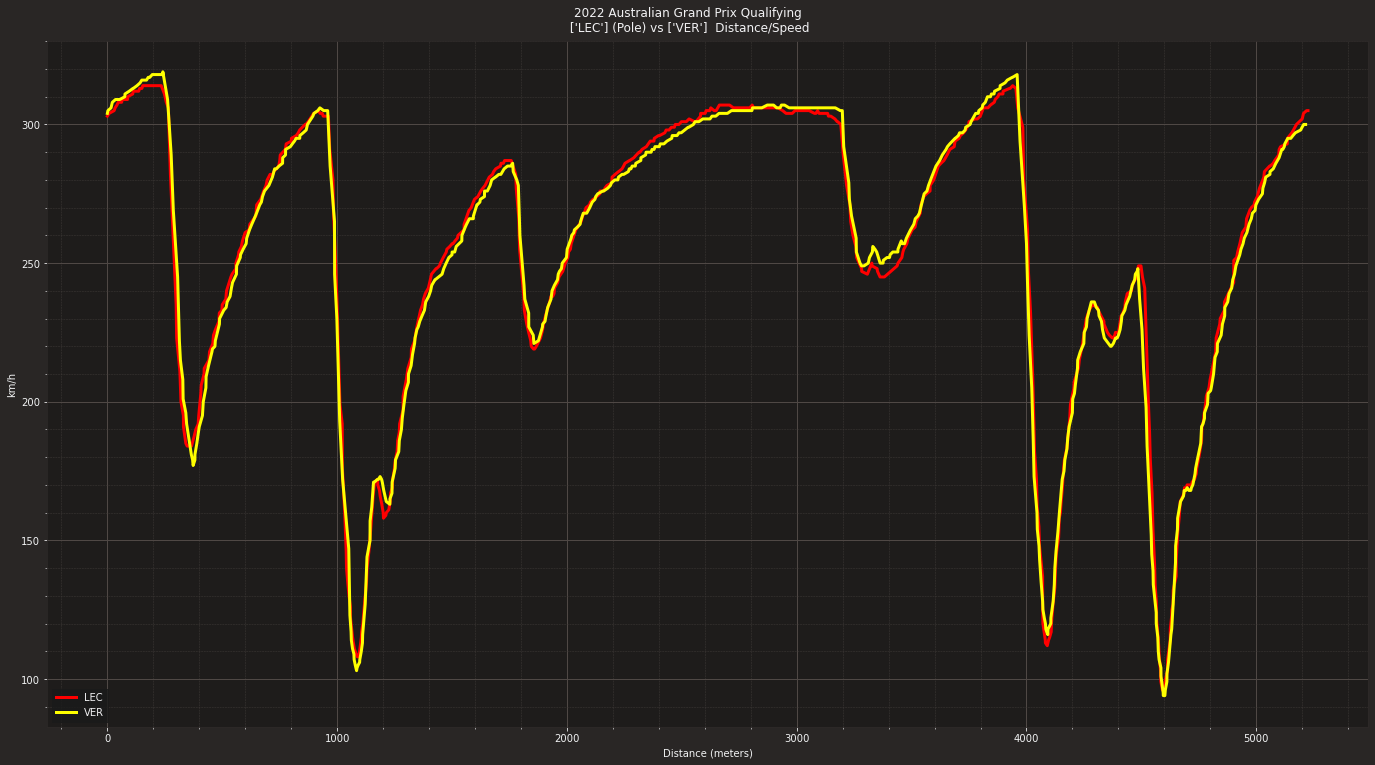

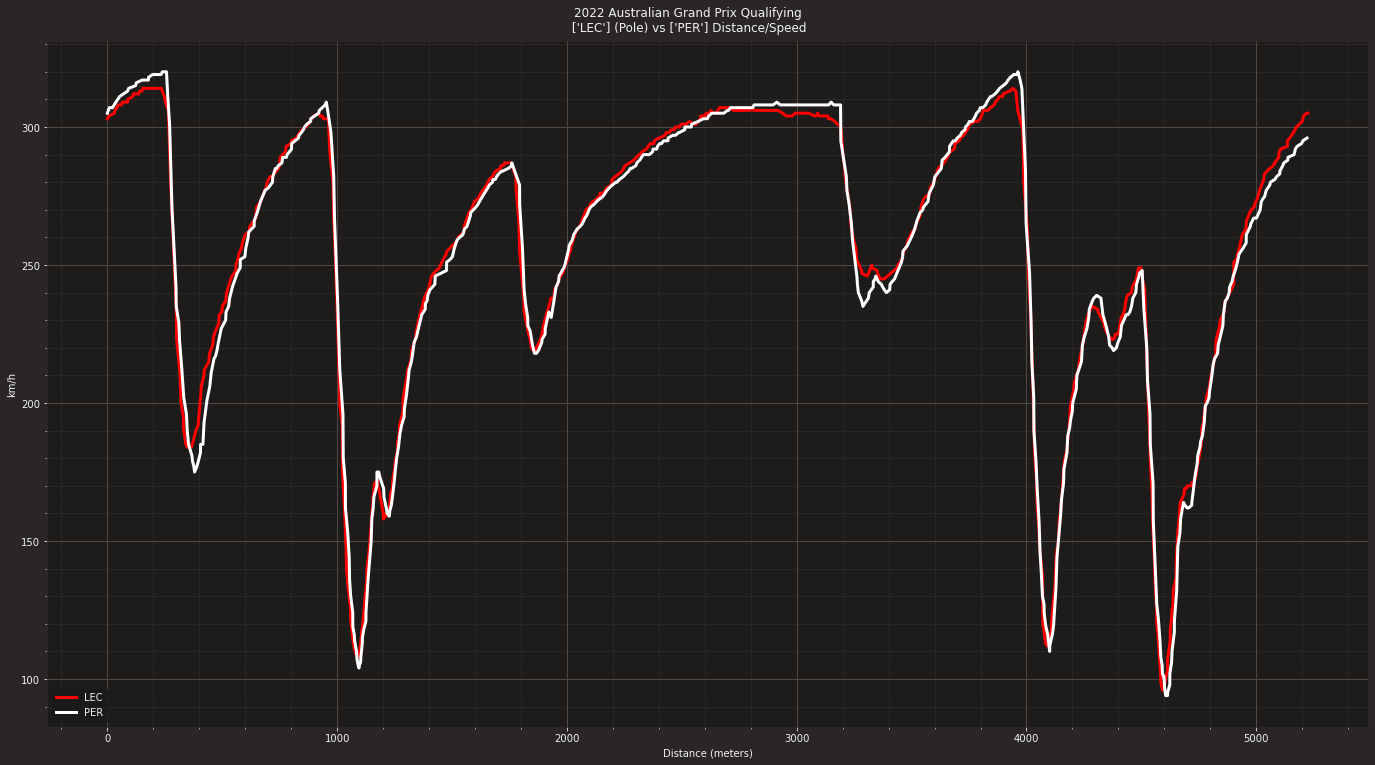

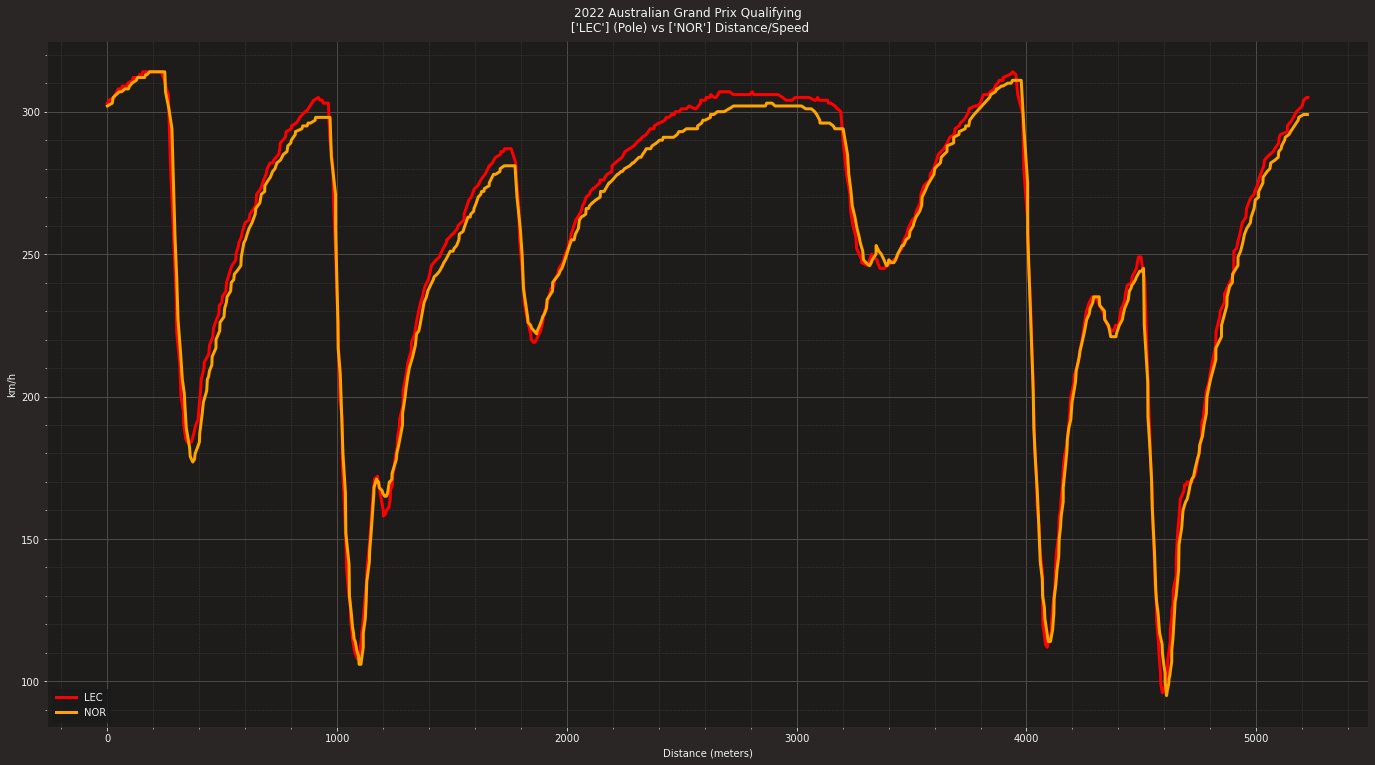

In [23]:
fig, ax = plt.subplots(1,tight_layout=True)
fig.suptitle(f"{year} {circuit} Qualifying\n {flec['Driver'].unique()} (Pole) vs {fver['Driver'].unique()}  Distance/Speed")
plt.gcf().set_size_inches(19.2,10.8)
ax.plot(flec['Distance'], flec['Speed'], label='LEC',color='red', lw=3, ls='-')
ax.plot(fver['Distance'], fver['Speed'], label='VER',color='yellow',lw=3, ls='-')
ax.set(ylabel='km/h', xlabel='Distance (meters)')
ax.legend(loc="lower left")
plt.savefig(f"{year} {circuit} {flec['Driver'].unique()} vs {fver['Driver'].unique()} Qualifying Distance-Speed.jpeg",dpi=100)
plt.show()

fig, ax = plt.subplots(1,tight_layout=True)
fig.suptitle(f"{year} {circuit} Qualifying\n {flec['Driver'].unique()} (Pole) vs {fper['Driver'].unique()} Distance/Speed")
plt.gcf().set_size_inches(19.2,10.8)
ax.plot(flec['Distance'], flec['Speed'], label='LEC',color='red',lw=3, ls='-')
ax.plot(fper['Distance'], fper['Speed'], label='PER',color='white',lw=3, ls='-')
ax.set(ylabel='km/h', xlabel='Distance (meters)')
ax.legend(loc="lower left")
plt.savefig(f"{year} {circuit} {flec['Driver'].unique()} vs {fper['Driver'].unique()} Qualifying Distance-Speed.jpeg",dpi=100)
plt.show()

fig, ax = plt.subplots(1,tight_layout=True)
fig.suptitle(f"{year} {circuit} Qualifying\n {flec['Driver'].unique()} (Pole) vs {fnor['Driver'].unique()} Distance/Speed")
plt.gcf().set_size_inches(19.2,10.8)
ax.plot(flec['Distance'], flec['Speed'], label='LEC',color='red',lw=3, ls='-')
ax.plot(fnor['Distance'], fnor['Speed'], label='NOR',color='orange',lw=3, ls='-')
ax.set(ylabel='km/h', xlabel='Distance (meters)')
ax.legend(loc="lower left")
plt.savefig(f"{year} {circuit} {flec['Driver'].unique()} vs {fnor['Driver'].unique()} Qualifying Distance-Speed.jpeg",dpi=100)
plt.show()

## Laptime / Speed Comparison (Distance / Speed does the same thing so this will be left commented)

In [24]:
# fig, ax = plt.subplots(2,tight_layout=True)
# fig.suptitle(f"{year} {circuit} Qualifying\n {flec['Driver']} (Pole) vs Top 4 Laptime/Speed Comparison")
# # plt.subplots_adjust(wspace=0.4,hspace=0.4)
# plt.gcf().set_size_inches(19.2,10.8)
# # ax[0].plot(flec['Time'], flec['Speed'], label='LEC', color='red')
# # ax[0].plot(fver['Time'], fver['Speed'], label='VER', color='blue')
# # ax[0].set(ylabel='km/h', xlabel='Laptime (seconds)')
# # ax[0].legend(loc="lower left")

# ax[0].plot(flec['Time'], flec['Speed'], label='LEC', color='red')
# ax[0].plot(fsai['Time'], fsai['Speed'], label='SAI', color='green')
# ax[0].set(ylabel='km/h', xlabel='Laptime (seconds)')
# ax[0].legend(loc="lower left")

# ax[1].plot(flec['Time'], flec['Speed'], label='LEC', color='red')
# ax[1].plot(fper['Time'], fper['Speed'], label='PER', color='white')
# ax[1].set(ylabel='km/h', xlabel='Laptime (seconds)')
# ax[1].legend(loc="lower left")

# plt.savefig(f"{year} {circuit} Qualifying Laptime-Speed Comparison.jpeg",dpi=100)
# plt.show()

### Comparing Teammates Qualifying

In [25]:
#Creating lap dataframes and sorting them by LapTime.

zhou=pd.DataFrame(quali.laps.pick_driver('ZHO').pick_fastest()).T
bot=pd.DataFrame(quali.laps.pick_driver('BOT').pick_fastest()).T
merge1=pd.merge(zhou,bot,how='outer')
fl1 = Laps(merge1).sort_values(by='LapTime').reset_index(drop=True)
fl1.dropna(axis=1)

schu=pd.DataFrame(quali.laps.pick_driver('MSC').pick_fastest()).T
magn=pd.DataFrame(quali.laps.pick_driver('MAG').pick_fastest()).T
merge2=pd.merge(schu,magn,how='outer')
fl2=Laps(merge2).sort_values(by='LapTime').reset_index(drop=True)
fl2.dropna(axis=1)

ricc=pd.DataFrame(quali.laps.pick_driver('RIC').pick_fastest()).T
norr=pd.DataFrame(quali.laps.pick_driver('NOR').pick_fastest()).T
merge3=pd.merge(ricc,norr,how='outer')
fl3=Laps(merge3).sort_values(by='LapTime').reset_index(drop=True)
fl3.dropna(axis=1)

vers=pd.DataFrame(quali.laps.pick_driver('VER').pick_fastest()).T
pere=pd.DataFrame(quali.laps.pick_driver('PER').pick_fastest()).T
merge4=pd.merge(vers,pere,how='outer')
fl4 = Laps(merge4).sort_values(by='LapTime').reset_index(drop=True)
fl4.dropna(axis=1)

lecl=pd.DataFrame(quali.laps.pick_driver('LEC').pick_fastest()).T
sain=pd.DataFrame(quali.laps.pick_driver('SAI').pick_fastest()).T
merge5=pd.merge(lecl,sain,how='outer')
fl5=Laps(merge5).sort_values(by='LapTime').reset_index(drop=True)
fl5.dropna(axis=1)

# vett=pd.DataFrame(quali.laps.pick_driver('VET').pick_fastest()).T
# stro=pd.DataFrame(quali.laps.pick_driver('STR').pick_fastest()).T
# merge6=pd.merge(vett,stro,how='outer')
# fl6=Laps(merge6).sort_values(by='LapTime').reset_index(drop=True)
# fl6.dropna(axis=1)
#Can't compare Stroll to Vettel aas the former did not set a time in Q1.

russ=pd.DataFrame(quali.laps.pick_driver('RUS').pick_fastest()).T
hami=pd.DataFrame(quali.laps.pick_driver('HAM').pick_fastest()).T
merge7=pd.merge(russ,hami,how='outer')
fl7=Laps(merge7).sort_values(by='LapTime').reset_index(drop=True)
fl7.dropna(axis=1)

gasl=pd.DataFrame(quali.laps.pick_driver('GAS').pick_fastest()).T
tsun=pd.DataFrame(quali.laps.pick_driver('TSU').pick_fastest()).T
merge8=pd.merge(gasl,tsun,how='outer')
fl8=Laps(merge8).sort_values(by='LapTime').reset_index(drop=True)
fl8.dropna(axis=1)
# print(fl8)

alon=pd.DataFrame(quali.laps.pick_driver('ALO').pick_fastest()).T
ocon=pd.DataFrame(quali.laps.pick_driver('OCO').pick_fastest()).T
merge9=pd.merge(alon,ocon,how='outer')
fl9=Laps(merge9).sort_values(by='LapTime').reset_index(drop=True)
fl9.dropna(axis=1)

albo=pd.DataFrame(quali.laps.pick_driver('ALB').pick_fastest()).T
lati=pd.DataFrame(quali.laps.pick_driver('LAT').pick_fastest()).T
merge10=pd.merge(albo,lati,how='outer')
fl10=Laps(merge10).sort_values(by='LapTime').reset_index(drop=True)
fl10.dropna(axis=1)

,Time,DriverNumber,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate
0,0 days 00:29:21.848000,23,0 days 00:01:20.135000,7.0,2.0,0 days 00:00:27.401000,0 days 00:00:18.067000,0 days 00:00:34.667000,0 days 00:28:29.114000,0 days 00:28:47.181000,0 days 00:29:21.848000,283.0,300.0,300.0,268.0,True,SOFT,True,0 days 00:28:01.713000,Williams,ALB,1,True
1,0 days 00:22:33.241000,6,0 days 00:01:21.372000,4.0,1.0,0 days 00:00:27.719000,0 days 00:00:18.192000,0 days 00:00:35.461000,0 days 00:21:39.588000,0 days 00:21:57.780000,0 days 00:22:33.241000,281.0,301.0,302.0,163.0,True,SOFT,True,0 days 00:21:11.869000,Williams,LAT,2,True


In [26]:
best1=fl1.pick_fastest()
fl1['LapTimeDiff']=fl1['LapTime']-best1['LapTime']
# print(fl1[['Driver', 'LapTime', 'LapTimeDiff']])

best2=fl2.pick_fastest()
fl2['LapTimeDiff']=fl2['LapTime']-best2['LapTime']
# print(fl2[['Driver', 'LapTime', 'LapTimeDiff']])

best3=fl3.pick_fastest()
fl3['LapTimeDiff']=fl3['LapTime']-best3['LapTime']
# print(fl3[['Driver', 'LapTime', 'LapTimeDiff']])

best4=fl4.pick_fastest()
fl4['LapTimeDiff']=fl4['LapTime']-best4['LapTime']
# print(fl4[['Driver', 'LapTime', 'LapTimeDiff']])

best5=fl5.pick_fastest()
fl5['LapTimeDiff']=fl5['LapTime']-best5['LapTime']
# print(fl5[['Driver', 'LapTime', 'LapTimeDiff']])

# best6=fl6.pick_fastest()
# fl6['LapTimeDiff']=fl6['LapTime']-best6['LapTime']
# print(fl6[['Driver', 'LapTime', 'LapTimeDiff']])

best7=fl7.pick_fastest()
fl7['LapTimeDiff']=fl7['LapTime']-best7['LapTime']
# print(fl7[['Driver', 'LapTime', 'LapTimeDiff']])

best8=fl8.pick_fastest()
fl8['LapTimeDiff']=fl8['LapTime']-best8['LapTime']
# print(fl8[['Driver', 'LapTime', 'LapTimeDiff']])

best9=fl9.pick_fastest()
fl9['LapTimeDiff']=fl9['LapTime']-best9['LapTime']
# print(fl9[['Driver', 'LapTime', 'LapTimeDiff']])

best10=fl10.pick_fastest()
fl10['LapTimeDiff']=fl10['LapTime']-best10['LapTime']
# print(fl10[['Driver', 'LapTime', 'LapTimeDiff']])

# tcol1 = list()
# for index, lap in fl1.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol1.append(color)

# tcol2 = list()
# for index, lap in fl2.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol2.append(color)
    
# tcol3 = list()
# for index, lap in fl3.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol3.append(color)

# tcol4 = list()
# for index, lap in fl4.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol4.append(color)

# tcol5 = list()
# for index, lap in fl5.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol5.append(color)

# # tcol6 = list()
# # for index, lap in fl6.iterlaps():
# #     color = ff1.plotting.team_color(lap['Team'])
# #     tcol6.append(color)

# tcol7 = list()
# for index, lap in fl7.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol7.append(color)
    
# tcol8 = list()
# for index, lap in fl8.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol8.append(color)

# tcol9 = list()
# for index, lap in fl9.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol9.append(color)

# tcol10 = list()
# for index, lap in fl10.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol10.append(color)
    

dcol1 = list()
for index, lap in fl1.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol1.append(color)

dcol2 = list()
for index, lap in fl2.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol2.append(color)
    
dcol3 = list()
for index, lap in fl3.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol3.append(color)
    
dcol4 = list()
for index, lap in fl4.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol4.append(color)

dcol5 = list()
for index, lap in fl5.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol5.append(color)

# dcol6 = list()
# for index, lap in fl6.iterlaps():
#     color = ff1.plotting.driver_color(lap['Driver'])
#     dcol6.append(color)

dcol7 = list()
for index, lap in fl7.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol7.append(color)

dcol8 = list()
for index, lap in fl8.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol8.append(color)

dcol9 = list()
for index, lap in fl9.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol9.append(color)

dcol10 = list()
for index, lap in fl10.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol10.append(color)

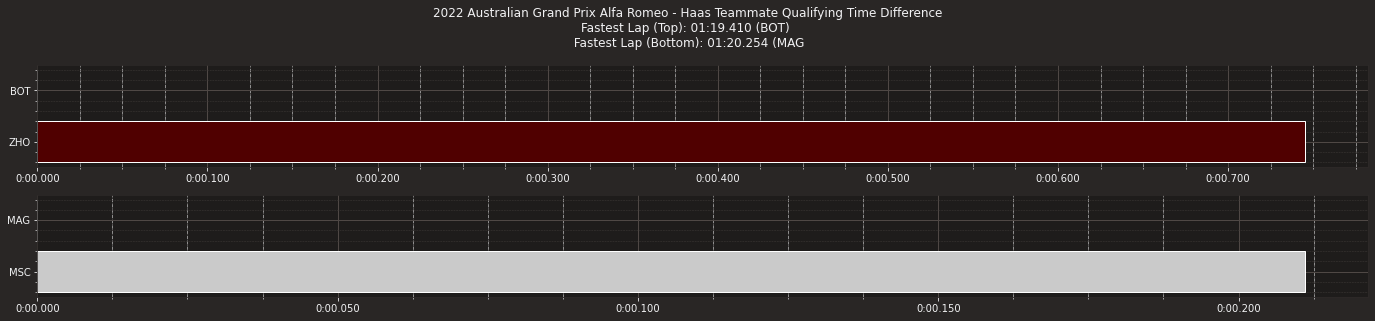

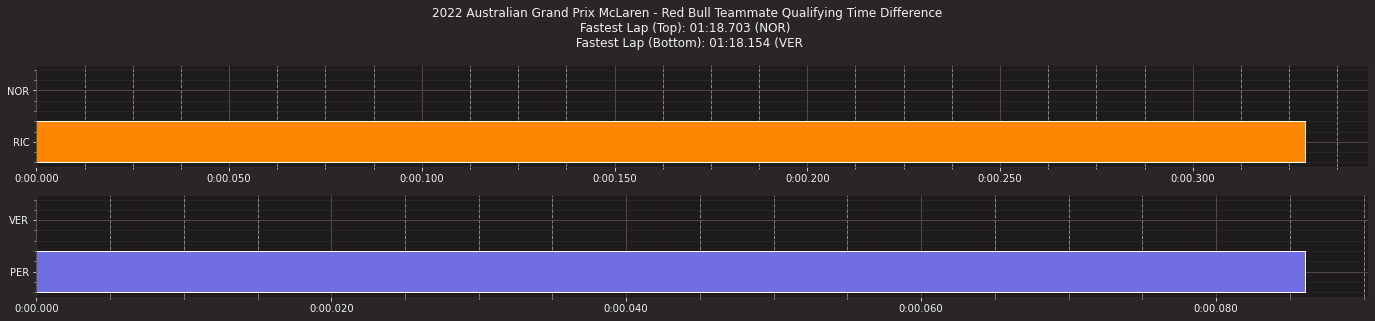

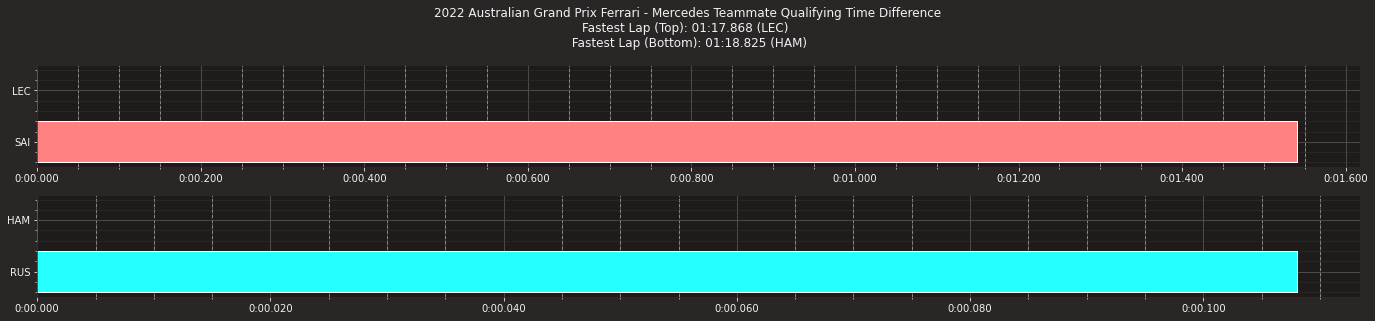

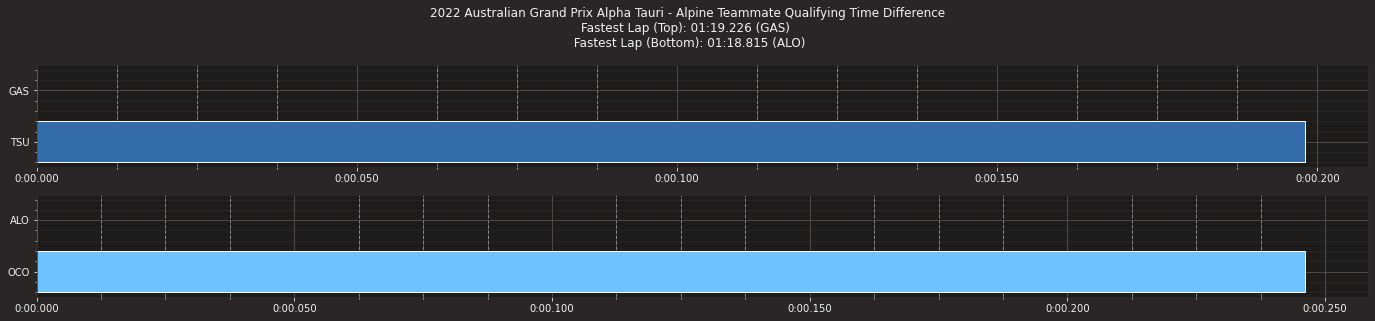

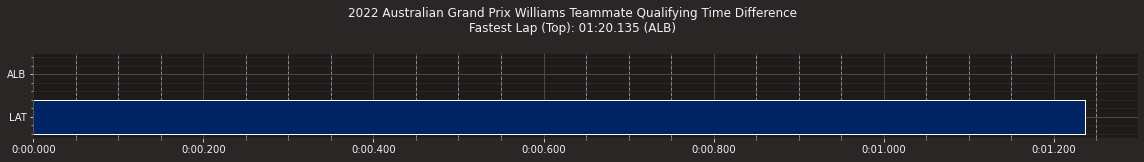

In [66]:
fig, ax = plt.subplots(2,tight_layout=True)
plt.gcf().set_size_inches(19.2,4.5)
ax[0].barh(fl1.index, fl1['LapTimeDiff'],color=dcol1, edgecolor='white')
ax[0].set_yticks(fl1.index)
ax[0].set_yticklabels(fl1['Driver'])
ax[0].invert_yaxis()
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr1 = strftimedelta(best1['LapTime'], '%m:%s.%ms')
ax[1].barh(fl2.index, fl2['LapTimeDiff'],color=dcol2, edgecolor='white')
ax[1].set_yticks(fl2.index)
ax[1].set_yticklabels(fl2['Driver'])
ax[1].invert_yaxis()
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr2 = strftimedelta(best2['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{year} {circuit} Alfa Romeo - Haas Teammate Qualifying Time Difference\n"
             f"Fastest Lap (Top): {lapstr1} ({best1['Driver']}) \n Fastest Lap (Bottom): {lapstr2} ({best2['Driver']}")
plt.savefig(f"{year} {circuit} Alfa Romeo - Haas Qualifying Teammate Time Difference.jpeg", dpi=100)
plt.show()

fig, ax = plt.subplots(2,tight_layout=True)
plt.gcf().set_size_inches(19.2,4.5)
ax[0].barh(fl3.index, fl3['LapTimeDiff'],color=dcol3, edgecolor='white')
ax[0].set_yticks(fl3.index)
ax[0].set_yticklabels(fl3['Driver'])
ax[0].invert_yaxis()
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr3 = strftimedelta(best3['LapTime'], '%m:%s.%ms')
ax[1].barh(fl4.index, fl4['LapTimeDiff'],color=dcol4, edgecolor='white')
ax[1].set_yticks(fl4.index)
ax[1].set_yticklabels(fl4['Driver'])
ax[1].invert_yaxis()
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr4 = strftimedelta(best4['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{year} {circuit} McLaren - Red Bull Teammate Qualifying Time Difference\n"
             f"Fastest Lap (Top): {lapstr3} ({best3['Driver']}) \n Fastest Lap (Bottom): {lapstr4} ({best4['Driver']}")
plt.savefig(f"{year} {circuit} McLaren - Red Bull Qualifying Teammate Time Difference.jpeg", dpi=100)
plt.show()

fig, ax = plt.subplots(2,tight_layout=True)
plt.gcf().set_size_inches(19.2,4.5)
ax[0].barh(fl5.index, fl5['LapTimeDiff'],color=dcol5, edgecolor='white')
ax[0].set_yticks(fl5.index)
ax[0].set_yticklabels(fl5['Driver'])
ax[0].invert_yaxis()
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr5 = strftimedelta(best5['LapTime'], '%m:%s.%ms')
ax[1].barh(fl7.index, fl7['LapTimeDiff'],color=dcol7, edgecolor='white')
ax[1].set_yticks(fl7.index)
ax[1].set_yticklabels(fl7['Driver'])
ax[1].invert_yaxis()
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr7 = strftimedelta(best7['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{year} {circuit} Ferrari - Mercedes Teammate Qualifying Time Difference\n"
             f"Fastest Lap (Top): {lapstr5} ({best5['Driver']}) \n Fastest Lap (Bottom): {lapstr7} ({best7['Driver']})")
plt.savefig(f"{year} {circuit} Ferrari - Mercedes Qualifying Teammate Time Difference.jpeg", dpi=100)
plt.show()

fig, ax = plt.subplots(2,tight_layout=True)
plt.gcf().set_size_inches(19.2,4.5)
# ax[0].barh(fl6.index, fl6['LapTimeDiff'],color=dcol6, edgecolor='white')
# ax[0].set_yticks(fl6.index)
# ax[0].set_yticklabels(fl6['Driver'])
# ax[0].invert_yaxis()
# ax[0].set_axisbelow(True)
# ax[0].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
# lapstr6 = strftimedelta(best1['LapTime'], '%m:%s.%ms')

ax[0].barh(fl8.index, fl8['LapTimeDiff'],color=dcol8, edgecolor='white')
ax[0].set_yticks(fl8.index)
ax[0].set_yticklabels(fl8['Driver'])
ax[0].invert_yaxis()
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr8 = strftimedelta(best8['LapTime'], '%m:%s.%ms')
ax[1].barh(fl9.index, fl9['LapTimeDiff'],color=dcol9, edgecolor='white')
ax[1].set_yticks(fl9.index)
ax[1].set_yticklabels(fl9['Driver'])
ax[1].invert_yaxis()
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr9 = strftimedelta(best9['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{year} {circuit} Alpha Tauri - Alpine Teammate Qualifying Time Difference\n"
             f"Fastest Lap (Top): {lapstr8} ({best8['Driver']}) \n Fastest Lap (Bottom): {lapstr9} ({best9['Driver']})")
plt.savefig(f"{year} {circuit} Alpha Tauri - Alpine Qualifying Teammate Time Difference.jpeg", dpi=100)
plt.show()

fig, ax = plt.subplots(tight_layout=True)
plt.gcf().set_size_inches(16,2.25)
ax.barh(fl10.index, fl10['LapTimeDiff'],color=dcol10, edgecolor='white')
ax.set_yticks(fl10.index)
ax.set_yticklabels(fl10['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr10 = strftimedelta(best10['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{year} {circuit} Williams Teammate Qualifying Time Difference\n"
             f"Fastest Lap (Top): {lapstr10} ({best10['Driver']})")
plt.savefig(f"{year} {circuit} Williams Qualifying Teammate Time Difference.jpeg", dpi=100)
plt.show()

# Race Analysis

In [28]:
year=2022
circuit='Australian Grand Prix'

race=ff1.get_session(year,circuit,'R')
lapsr=race.load_laps(with_telemetry=True)

C:\Users\EDGAR\anaconda3\lib\site-packages\fastf1\core.py:1127: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Australian Grand Prix - Race [v2.2.7]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '11', '63', '44', '4', '3', '31', '77', '10

In [29]:
race.results[:4]

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,1.0,1.0,NaT,NaT,NaT,0 days 01:27:46.548000,Finished,26.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,2.0,3.0,NaT,NaT,NaT,0 days 01:28:07.072000,Finished,18.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,3.0,6.0,NaT,NaT,NaT,0 days 01:28:12.141000,Finished,15.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,4.0,5.0,NaT,NaT,NaT,0 days 01:28:15.091000,Finished,12.0


## Average Laptime Over a Stint

In [30]:
filt=((lapsr['Compound']=='MEDIUM')& (lapsr['Driver']=='LEC'))
filt2=((lapsr['Compound']=='MEDIUM')& (lapsr['Driver']=='VER'))
medium_stints_lec=lapsr.loc[filt,['Compound','Stint','Driver','LapTime']]
medium_stints_ver=lapsr.loc[filt2,['Compound','Stint','Driver','LapTime']]

In [31]:
ave=sum(medium_stints_lec['LapTime'],datetime.timedelta())/ len(medium_stints_lec['LapTime'])
ave2=sum(medium_stints_ver['LapTime'],datetime.timedelta())/ len(medium_stints_ver['LapTime'])
avediff=ave-ave2
print(f"Charles average lap on Mediums: {ave}. Max average lap on Mediums: {ave2}. Here is the difference between the two average laps: {avediff}")

Charles average lap on Mediums: NaT. Max average lap on Mediums: NaT. Here is the difference between the two average laps: NaT


## Fastest Speed on Each Race Tyre

In [32]:
meds=lapsr.loc[(lapsr['Compound']=='MEDIUM'),['Driver','Stint','LapTime','LapNumber','SpeedST']]
filt3=(meds['SpeedST']==max(meds['SpeedST']))
fmeds=pd.DataFrame(meds.loc[filt3,:])

softs=lapsr.loc[(lapsr['Compound']=='SOFT'),['Driver','Stint','LapTime','LapNumber','SpeedST']]
filt4=(softs['SpeedST']==max(softs['SpeedST']))
fsoft=pd.DataFrame(softs.loc[filt4,:])

hards=lapsr.loc[(lapsr['Compound']=='HARD'),['Driver','Stint','LapTime','LapNumber','SpeedST']]
filt5=(hards['SpeedST']==max(hards['SpeedST']))
fhard=pd.DataFrame(hards.loc[filt5,:])

#Commenting out inters because they were not used in this race.
# inters=lapsr.loc[(lapsr['Compound']=='INTERMEDIATE'),['Driver','Stint','LapTime','LapNumber','SpeedST']]
# filt6=(inters['SpeedST']==max(inters['SpeedST']))
# fint=pd.DataFrame(inters.loc[filt6,:])
# fint
fhard,fmeds,fsoft

(    Driver  Stint                LapTime  LapNumber  SpeedST
 743    MSC      2 0 days 00:01:23.731000         48    326.0,
     Driver  Stint                LapTime  LapNumber  SpeedST
 420    BOT      1 0 days 00:01:25.459000         15    319.0,
     Driver  Stint                LapTime  LapNumber  SpeedST
 579    ALB      2 0 days 00:01:27.465000         58    234.0)

## Fastest Tyre Over a Stint

In [33]:
#How many stints were there?
print(f"There were {lapsr['Stint'].max()} stints in the {year} {circuit}.")

There were 4 stints in the 2022 Australian Grand Prix.


In [34]:
#Tyres used in Stint 1:
s1=s1.sort_values('LapTime')
s1tyres=lapsr.loc[lapsr['Stint']==1,['Compound']]
print(f"The tyres used in Stint 1 were:{s1tyres['Compound'].unique()}.")

#Average Stint 1 LapTime:
f1=((lapsr['Stint']==1)& (lapsr['LapTime'].notna()))
s1=lapsr.loc[f1,['LapTime','Compound','Stint','Driver','Team']]   
s1['Avg_Stint_LapTime']=sum(s1['LapTime'],datetime.timedelta())/ len(s1['LapTime'])
s1_avg_time=s1['Avg_Stint_LapTime'].to_list()
print(f"The average laptime for the first stint of the {year} {circuit} was {s1_avg_time[0]}.")


The tyres used in Stint 1 were:['MEDIUM' 'HARD'].
The average laptime for the first stint of the 2022 Australian Grand Prix was 0 days 00:01:34.936454987.


In [35]:
#Tyres used in Stint 2:
s2tyres=lapsr.loc[lapsr['Stint']==2,['Compound']]
print(f"The tyres used in Stint 2 were:{s2tyres['Compound'].unique()}.")

#Drivers that pitted at least once: 
f2=(lapsr['Stint']==2)&((lapsr['Compound']=='SOFT') | (lapsr['Compound']=='MEDIUM') | (lapsr['Compound']=='HARD'))
s3=lapsr.loc[f2,['Driver','LapTime','Compound','SpeedST','TyreLife']].sort_values('LapTime')
print(f"These were the drivers on that switched tyres 1 time: {s2['Driver'].unique()}.")

#Average Stint 2 LapTimes:
#For Soft tyres:
f2soft=((lapsr['Stint']==2)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='SOFT'))
s2soft=pd.DataFrame(lapsr.loc[f2soft,['LapTime','Compound','Stint','Driver','Team']])
s2soft['Avg_Stint_LapTime']=sum(s2soft['LapTime'],datetime.timedelta())/ len(s2soft['LapTime'])
#For Medium tyres:
f2medium=((lapsr['Stint']==2)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='MEDIUM'))
s2medium=pd.DataFrame(lapsr.loc[f2medium,['LapTime','Compound','Stint','Driver','Team']])
s2medium['Avg_Stint_LapTime']=sum(s2medium['LapTime'],datetime.timedelta())/ len(s2medium['LapTime'])
#For Hard tyres:
f2hard=((lapsr['Stint']==2)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='HARD'))
s2hard=pd.DataFrame(lapsr.loc[f2hard,['LapTime','Compound','Stint','Driver','Team']])
s2hard['Avg_Stint_LapTime']=sum(s2hard['LapTime'],datetime.timedelta())/ len(s2hard['LapTime'])

#Stint 2 Average LapTime Difference:
#Softs to Mediums
s2sof=s2soft['Avg_Stint_LapTime'].to_list()
s2med=s2medium['Avg_Stint_LapTime'].to_list()
s2sofmedtime_diff=s2sof[0]-s2med[0]
print(f"The average laptime difference between Softs and Mediums in the second stint of the {year} {circuit} was: {s2sofmedtime_diff} seconds.\n Average laptime on Softs was {s2sof[0]} \n Average laptime on Mediums was {s2med[0]}.")
#Mediums to Hards
s2har=s2hard['Avg_Stint_LapTime'].to_list()
s2medhartime_diff=s2har[0]-s2med[0]
print(f"The average laptime difference between Mediums and Hards in the second stint of the {year} {circuit} was: {s2medhartime_diff} seconds.\n Average laptime on Mediums was {s2med[0]} \n Average laptime on Hards was {s2har[0]}.")
#Softs to Hards
s2sofhartime_diff=s2har[0]-s2sof[0]
print(f"The average laptime difference between Softs and Hards in the second stint of the {year} {circuit} was: {s2sofhartime_diff} seconds.\n Average laptime on Softs was {s2sof[0]} \n Average laptime on Hards was {s2har[0]}.")


The tyres used in Stint 2 were:['HARD' 'SOFT' 'MEDIUM'].
These were the drivers on that switched tyres 1 time: ['ALO'].
The average laptime difference between Softs and Mediums in the second stint of the 2022 Australian Grand Prix was: 0 days 00:00:00.991484849 seconds.
 Average laptime on Softs was 0 days 00:01:27.465000 
 Average laptime on Mediums was 0 days 00:01:26.473515151.
The average laptime difference between Mediums and Hards in the second stint of the 2022 Australian Grand Prix was: 0 days 00:00:01.845904891 seconds.
 Average laptime on Mediums was 0 days 00:01:26.473515151 
 Average laptime on Hards was 0 days 00:01:28.319420042.
The average laptime difference between Softs and Hards in the second stint of the 2022 Australian Grand Prix was: 0 days 00:00:00.854420042 seconds.
 Average laptime on Softs was 0 days 00:01:27.465000 
 Average laptime on Hards was 0 days 00:01:28.319420042.


In [36]:
#Tyres used in Stint 3:
s3tyres=lapsr.loc[lapsr['Stint']==3,['Compound']]
print(f"The tyres used in Stint 3 were:{s3tyres['Compound'].unique()}.")

#Drivers that pitted twice:
f3=(lapsr['Stint']<=3)&((lapsr['Compound']=='SOFT')| (lapsr['Compound']=='MEDIUM') | (lapsr['Compound']=='HARD'))
s3=lapsr.loc[f3,['Driver','LapTime','Compound','SpeedST','TyreLife']].sort_values('LapTime')
print(f"These were the drivers on that switched tyres 2 times: {s3['Driver'].unique()}.")

#Average Stint 3 LapTimes:
f3medium=((lapsr['Stint']==3)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='MEDIUM'))
s3medium=pd.DataFrame(lapsr.loc[f3medium,['LapTime','Compound','Stint','Driver','Team']])
s3medium['Avg_Stint_LapTime']=sum(s3medium['LapTime'],datetime.timedelta())/ len(s3medium['LapTime'])

f3hard=((lapsr['Stint']==3)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='HARD'))
s3hard=pd.DataFrame(lapsr.loc[f3hard,['LapTime','Compound','Stint','Driver','Team']])
s3hard['Avg_Stint_LapTime']=sum(s3hard['LapTime'],datetime.timedelta())/ len(s3hard['LapTime'])

#Stint 3 Average LapTime Difference:
#Mediums to Hards
s3med=s3medium['Avg_Stint_LapTime'].to_list()
s3har=s3hard['Avg_Stint_LapTime'].to_list()
s3medhartime_diff=s3har[0]-s3med[0]
print(f"The average laptime difference between Mediums and Hards in the third stint of the {year} {circuit} was: {s3medhartime_diff} seconds.\n Average laptime on Mediums was {s3med[0]} \n Average laptime on Hards was {s3har[0]}.")


The tyres used in Stint 3 were:['HARD' 'MEDIUM'].
These were the drivers on that switched tyres 2 times: ['LEC' 'ALO' 'PER' 'RUS' 'BOT' 'VER' 'HAM' 'NOR' 'RIC' 'OCO' 'ZHO' 'ALB'
 'GAS' 'MSC' 'MAG' 'TSU' 'LAT' 'VET' 'STR' 'SAI'].
The average laptime difference between Mediums and Hards in the third stint of the 2022 Australian Grand Prix was: 0 days 00:00:04.151811320 seconds.
 Average laptime on Mediums was 0 days 00:01:26.356000 
 Average laptime on Hards was 0 days 00:01:30.507811320.


In [37]:
#Tyres used in Stint 4:
s4tyres=lapsr.loc[lapsr['Stint']==4,['Compound']]
print(f"The tyres used in Stint 4 were:{s4tyres['Compound'].unique()}.")

#Drivers that pitted thrice:
f4=(lapsr['Stint']==4)&((lapsr['Compound']=='SOFT')| (lapsr['Compound']=='HARD'))
s4=lapsr.loc[f4,['Driver','LapTime','Compound','SpeedST','TyreLife']].sort_values('LapTime')
print(f"These were the drivers that switched tyres 3 times: {s4['Driver'].unique()}.")

#Average Stint 4 LapTimes:
f4hard=((lapsr['Stint']==4)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='HARD'))
s4hard=pd.DataFrame(lapsr.loc[f4hard,['LapTime','Compound','Stint','Driver','Team']])
s4hard['Avg_Stint_LapTime']=sum(s4hard['LapTime'],datetime.timedelta())/ len(s4hard['LapTime'])
s4har=s4hard['Avg_Stint_LapTime'].to_list()
print(f"Average laptime on Hards for the fourth stint of the {year} {circuit} was {s4har[0]}.")

The tyres used in Stint 4 were:['HARD'].
These were the drivers that switched tyres 3 times: ['STR'].
Average laptime on Hards for the fourth stint of the 2022 Australian Grand Prix was 0 days 00:01:28.363117647.


### Fastest Minisectors in the race

In [38]:
#Getting the laps from all 4 drivers
llec=lapsr.pick_driver('LEC')
lrus=lapsr.pick_driver('RUS')
lham=lapsr.pick_driver('HAM')
lper=lapsr.pick_driver('PER')
#Getting telemetry data from drivers
flec=llec.pick_fastest().get_telemetry().add_distance()
fham=lham.pick_fastest().get_telemetry().add_distance()
frus=lrus.pick_fastest().get_telemetry().add_distance()
fper=lper.pick_fastest().get_telemetry().add_distance()
#Creating driver column
flec['Driver']='LEC'
frus['Driver']='RUS'
fham['Driver']='HAM'
fper['Driver']='PER'
#Getting everything in one dataframe
t1=flec.append(fham)
t2=t1.append(fper)
telemetry=t2.append(frus)

In [39]:
#Creating the minisectors (doing 30 - 10 per sector)
nmini=30
#Grabbing circuit distance
cdist=max(telemetry['Distance'])
#Dividing circuit distance by number of minisectors to have our minisector distance
minilen=cdist/nmini
#Calculating distances at which the next minisector begins
minis=[0]
for b in range(0,(nmini-1)):
    minis.append(minilen*(b+1))
#Assigning every row in the dataset to a minisector, so we always know which minisector the cars were located in.
telemetry['Minisector']=telemetry['Distance'].apply(
    lambda dist:(
        int((dist // minilen)+1)))

In [40]:
#Finding the fastest driver per minisector so we can color it in the minisector map
avgspeed=telemetry.groupby(['Minisector','Driver'])['Speed'].mean().reset_index()
fastest = avgspeed.loc[avgspeed.groupby(['Minisector'])['Speed'].idxmax()]
fastest = fastest[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_Driver'})

In [41]:
fastest['Fastest_Driver'].unique()
#4 drivers had a fastest minisector

array(['LEC', 'HAM', 'PER', 'RUS'], dtype=object)

In [42]:
# Fastest driver per minisector + telemetry
telemetry = telemetry.merge(fastest, on=['Minisector'])

# Ordering by distance
telemetry = telemetry.sort_values(by=['Distance'])

# Converting driver name to integer
telemetry.loc[telemetry['Fastest_Driver'] == 'LEC', 'Fastest_Driver_int'] = 1
telemetry.loc[telemetry['Fastest_Driver'] == 'HAM', 'Fastest_Driver_int'] = 4
telemetry.loc[telemetry['Fastest_Driver'] == 'PER', 'Fastest_Driver_int'] = 2
telemetry.loc[telemetry['Fastest_Driver'] == 'RUS', 'Fastest_Driver_int'] = 3

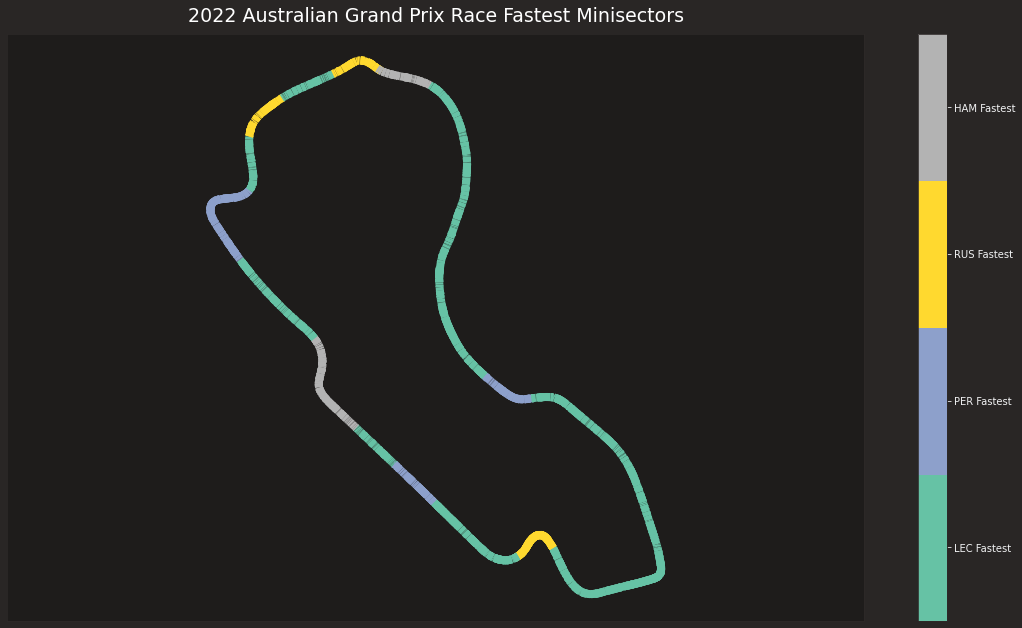

In [43]:
# Finally, plotting.
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_Driver_int'].to_numpy().astype(float)

cmap = cm.get_cmap('Set2', 4)
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(8)


plt.gca().add_collection(lc_comp)
plt.gcf().set_size_inches(19.2,10.8)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.title(f'{year} {circuit} Race Fastest Minisectors',color='white')
cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1,6))
cbar.set_ticks(np.arange(1.5, 6.5))
cbar.set_ticklabels(['LEC Fastest', 'PER Fastest','RUS Fastest','HAM Fastest'])

plt.savefig(f"{year} {circuit} Race Fastest Minisectors.jpeg", dpi=100)

plt.show()

### Race Pace Comparison - Leclerc vs. Perez

In [44]:
race.results[:5]

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,1.0,1.0,NaT,NaT,NaT,0 days 01:27:46.548000,Finished,26.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,2.0,3.0,NaT,NaT,NaT,0 days 01:28:07.072000,Finished,18.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,3.0,6.0,NaT,NaT,NaT,0 days 01:28:12.141000,Finished,15.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,4.0,5.0,NaT,NaT,NaT,0 days 01:28:15.091000,Finished,12.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,5.0,4.0,NaT,NaT,NaT,0 days 01:28:39.851000,Finished,10.0


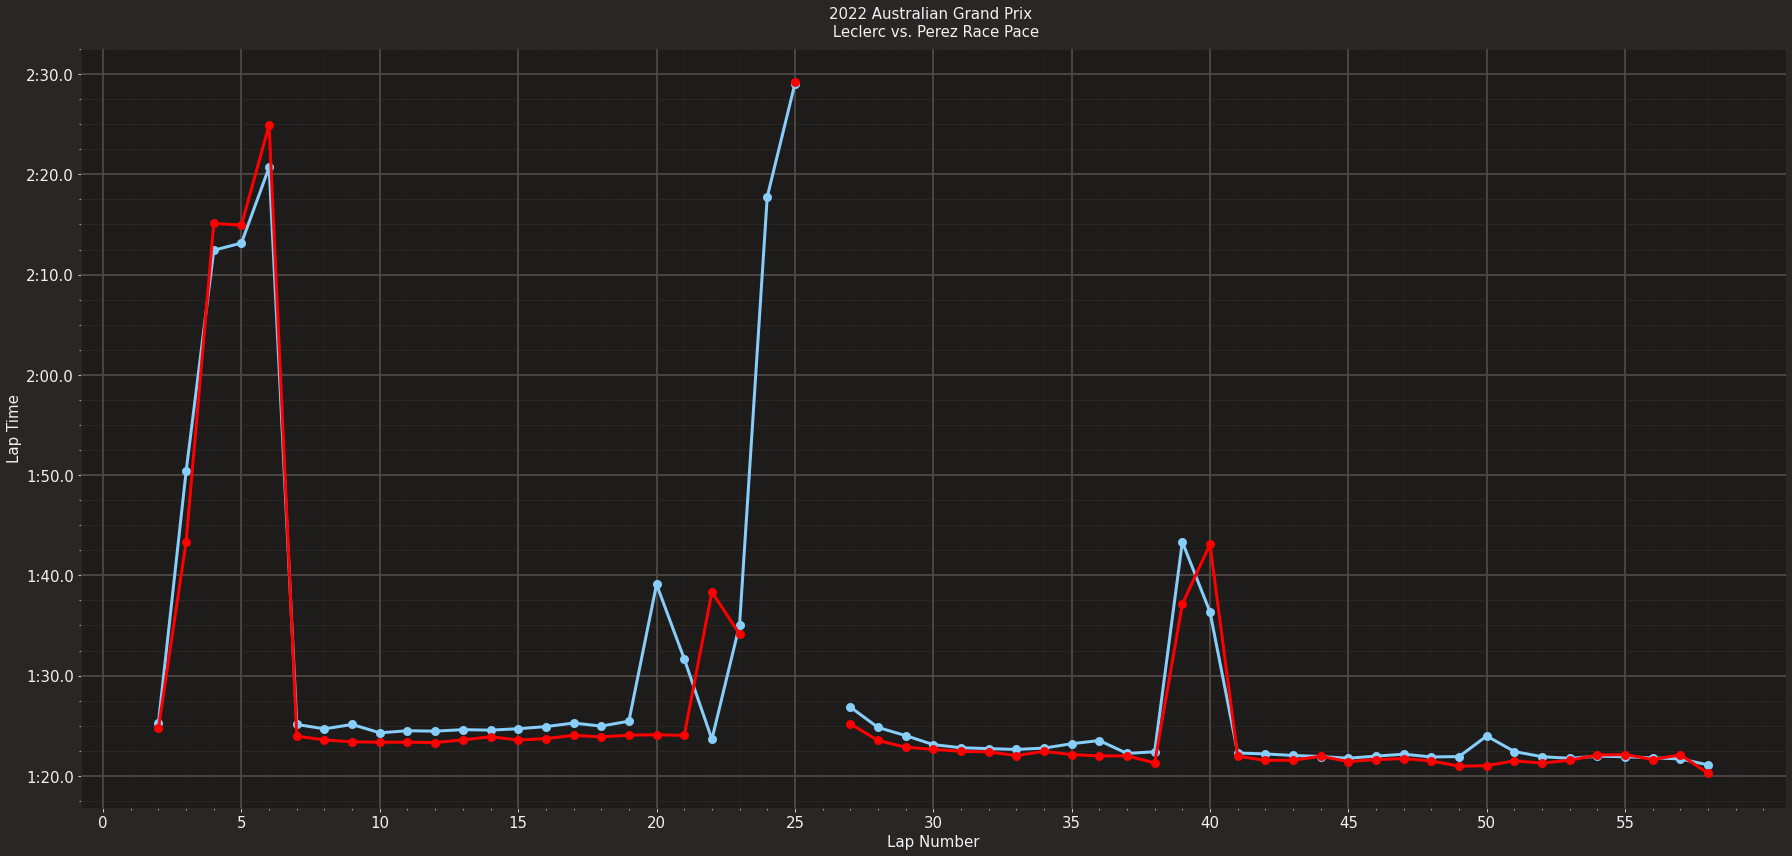

In [45]:
per = lapsr.pick_driver('PER')
lec = lapsr.pick_driver('LEC')
fig, ax = plt.subplots(tight_layout=True)
plt.gcf().set_size_inches(25.0,12.0)
plt.tick_params(axis='both', which='major', labelsize=15, grid_alpha=0.9, grid_ls='-',grid_lw=2)
plt.tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax.plot(per['LapNumber'], per['LapTime'], color='lightskyblue',linewidth=3,ls='-',marker='o',markersize=4,markerfacecolor='0.70', markeredgecolor='lightskyblue', markeredgewidth=5)
ax.plot(lec['LapNumber'], lec['LapTime'], color='red',linewidth=3,ls='-',marker='o',markersize=4,markerfacecolor='0.70', markeredgecolor='red', markeredgewidth=5)
ax.set_title(f"{year} {circuit} \n Leclerc vs. Perez Race Pace", fontsize=15)
ax.set_xticks(range(0,60,5))
ax.set_xlabel("Lap Number",fontsize=15)
ax.set_ylabel("Lap Time",fontsize=15)
plt.savefig(f"{year} {circuit} Leclerc vs Perez Race Pace Comparison.jpeg",dpi=100)
plt.show()

### Race Pace Comparison Between Teammates

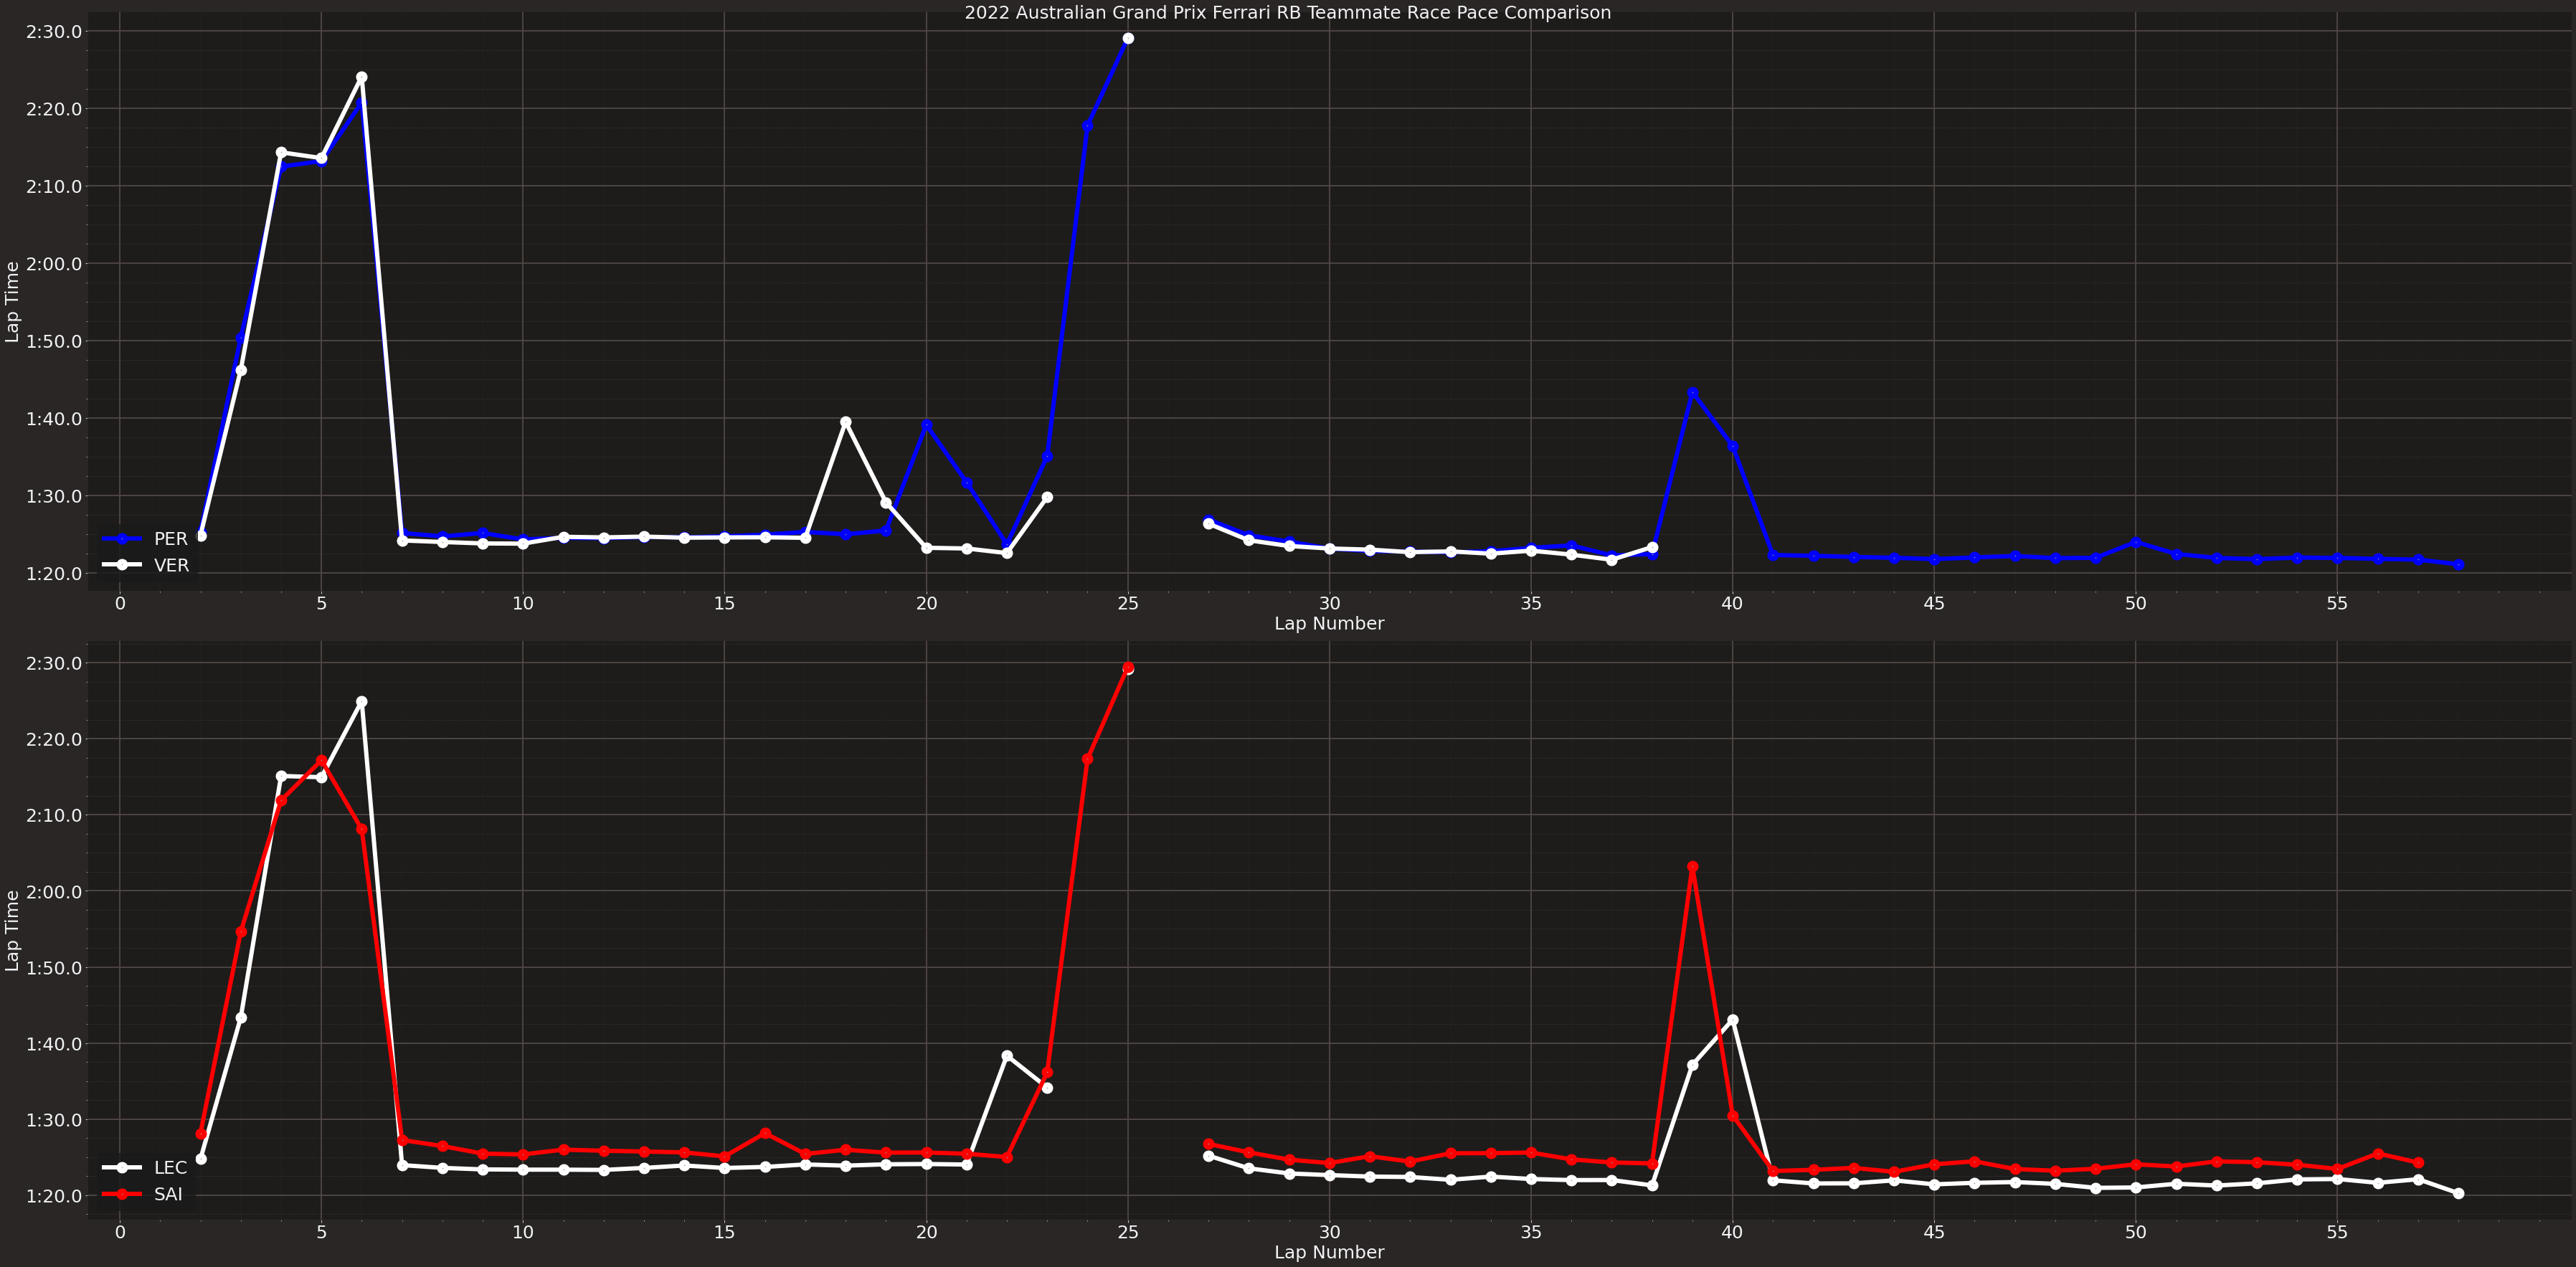

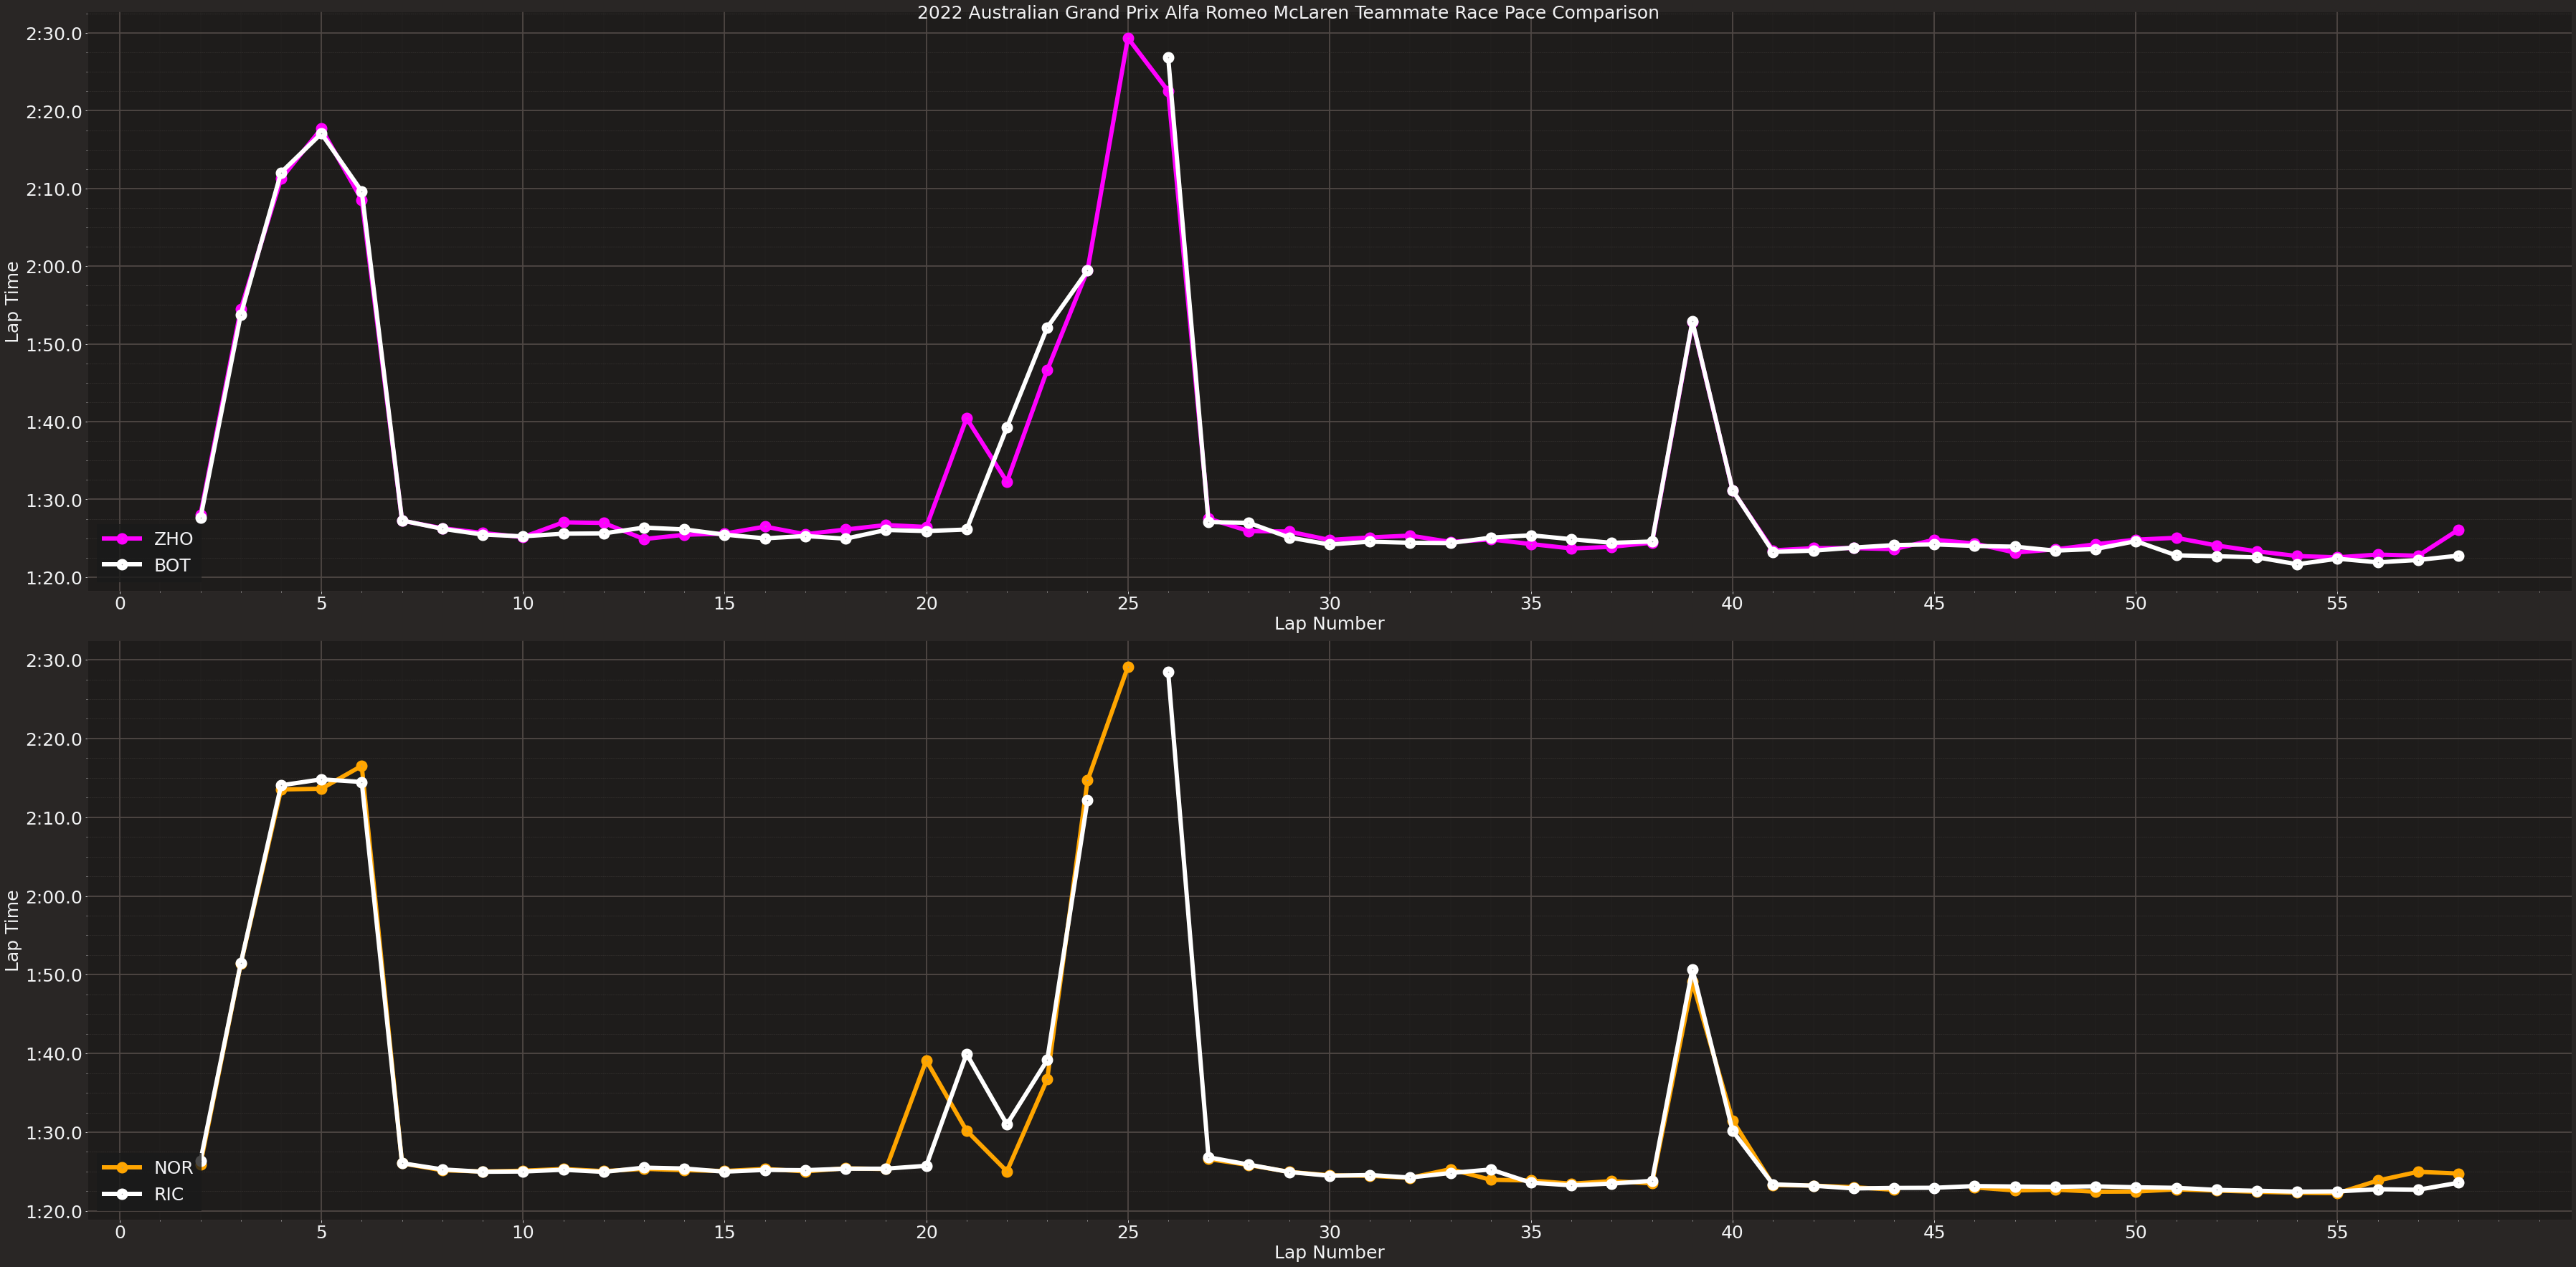

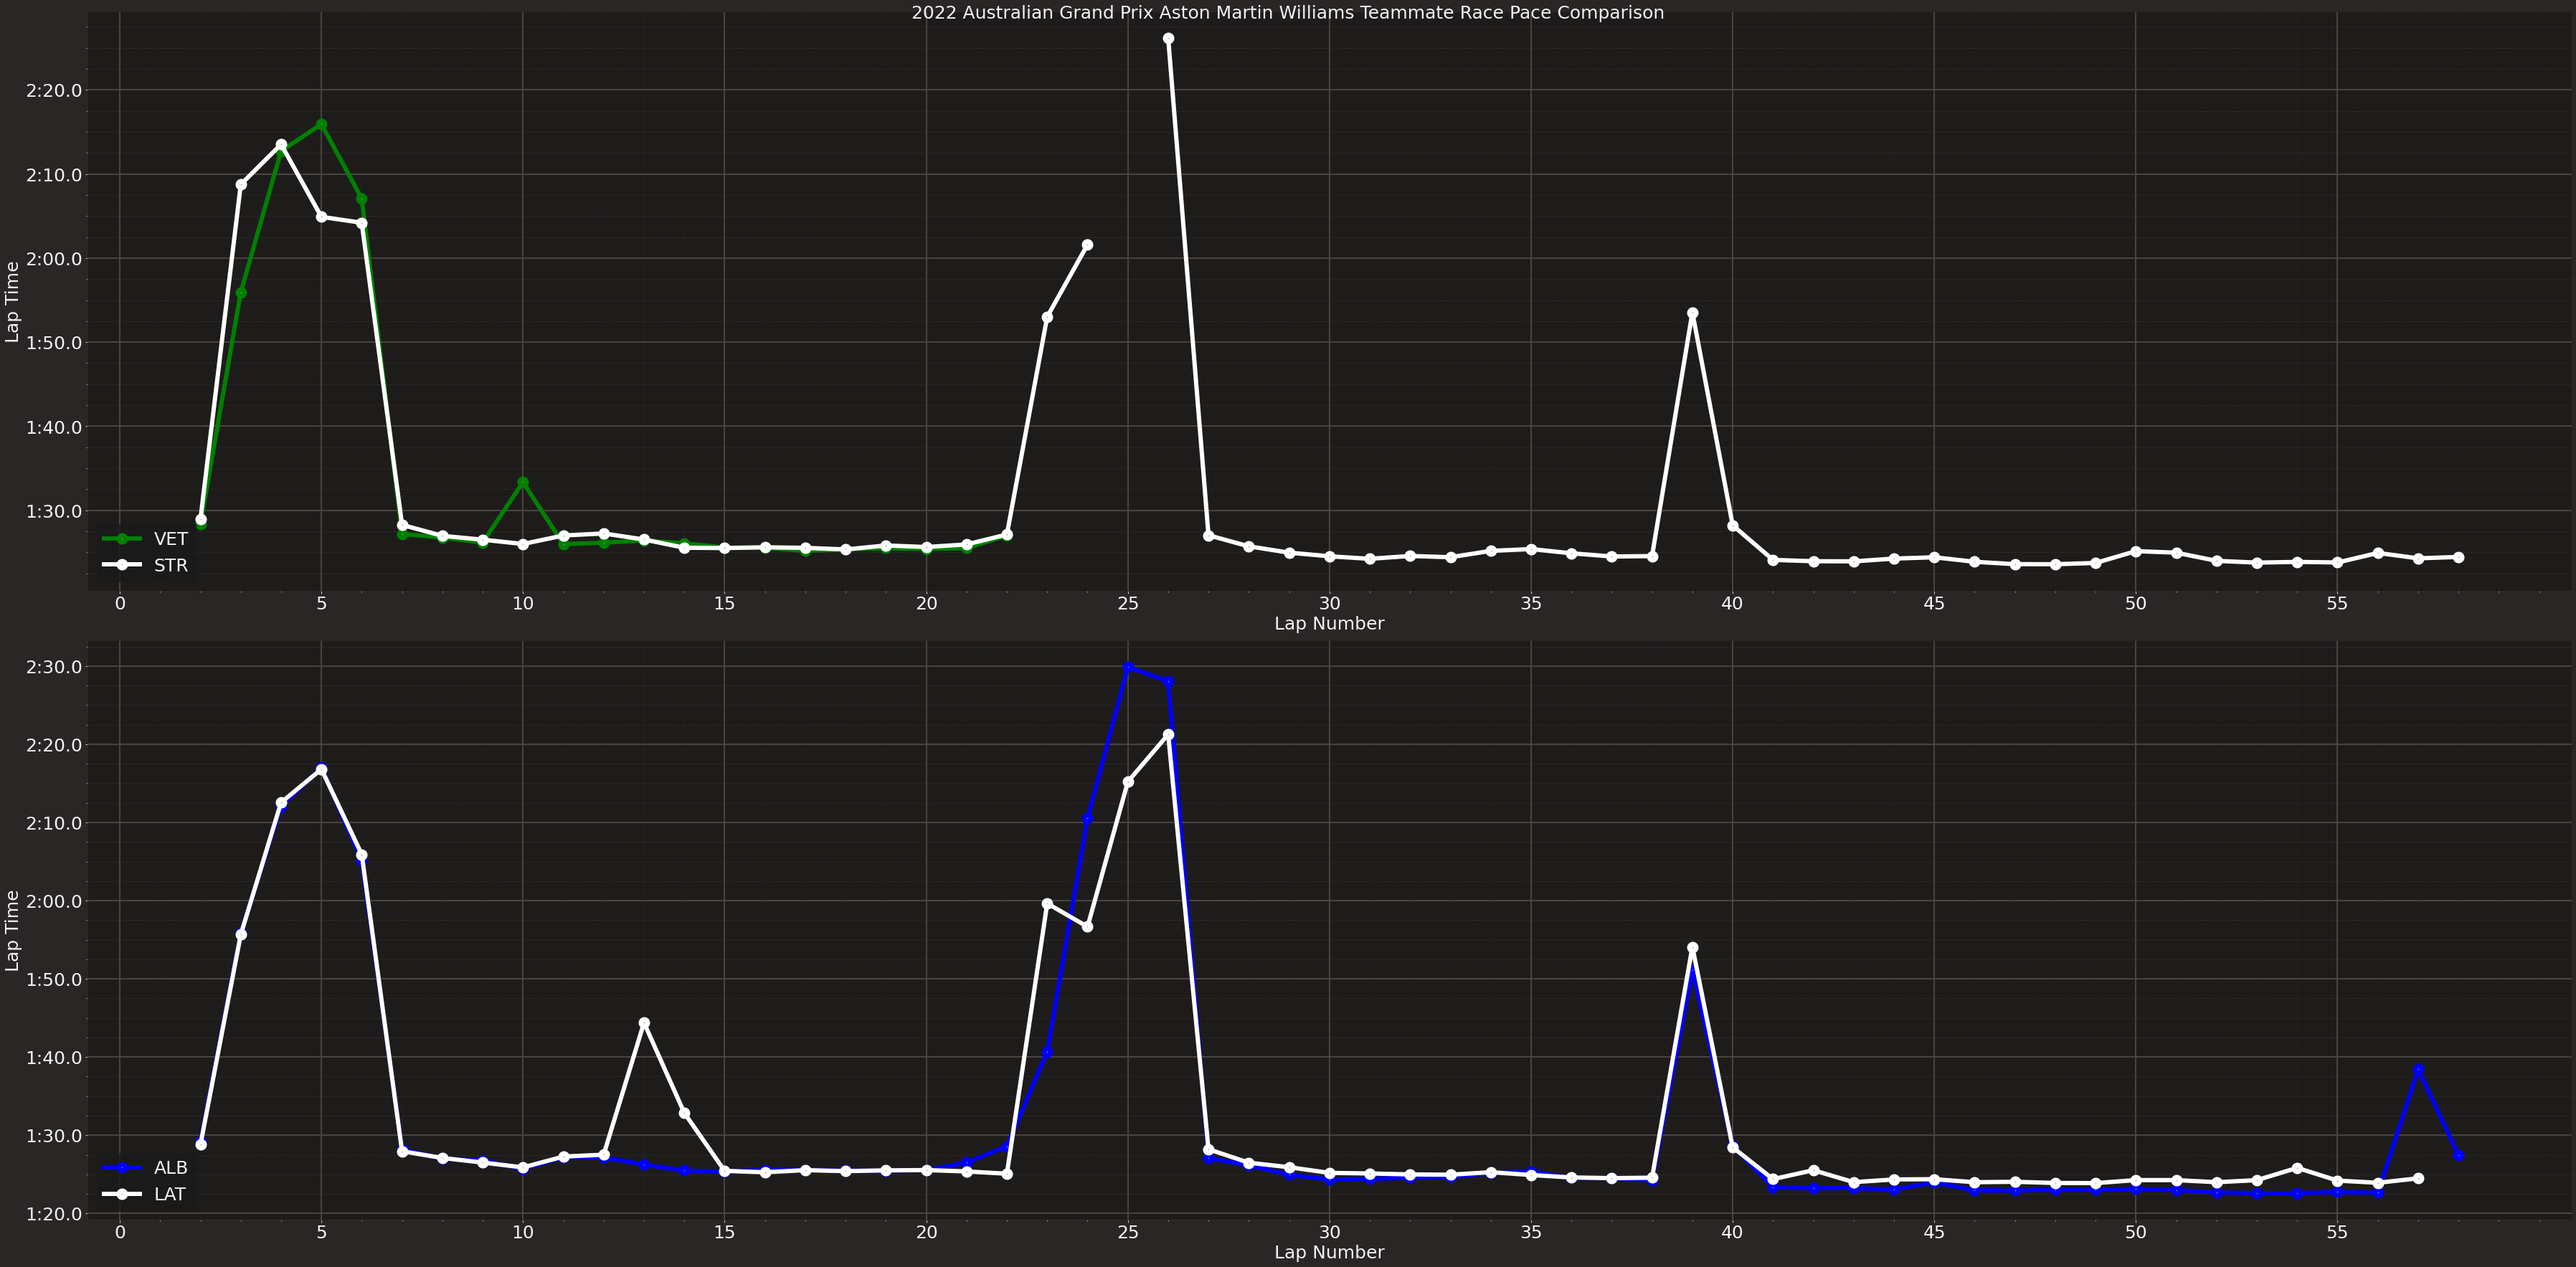

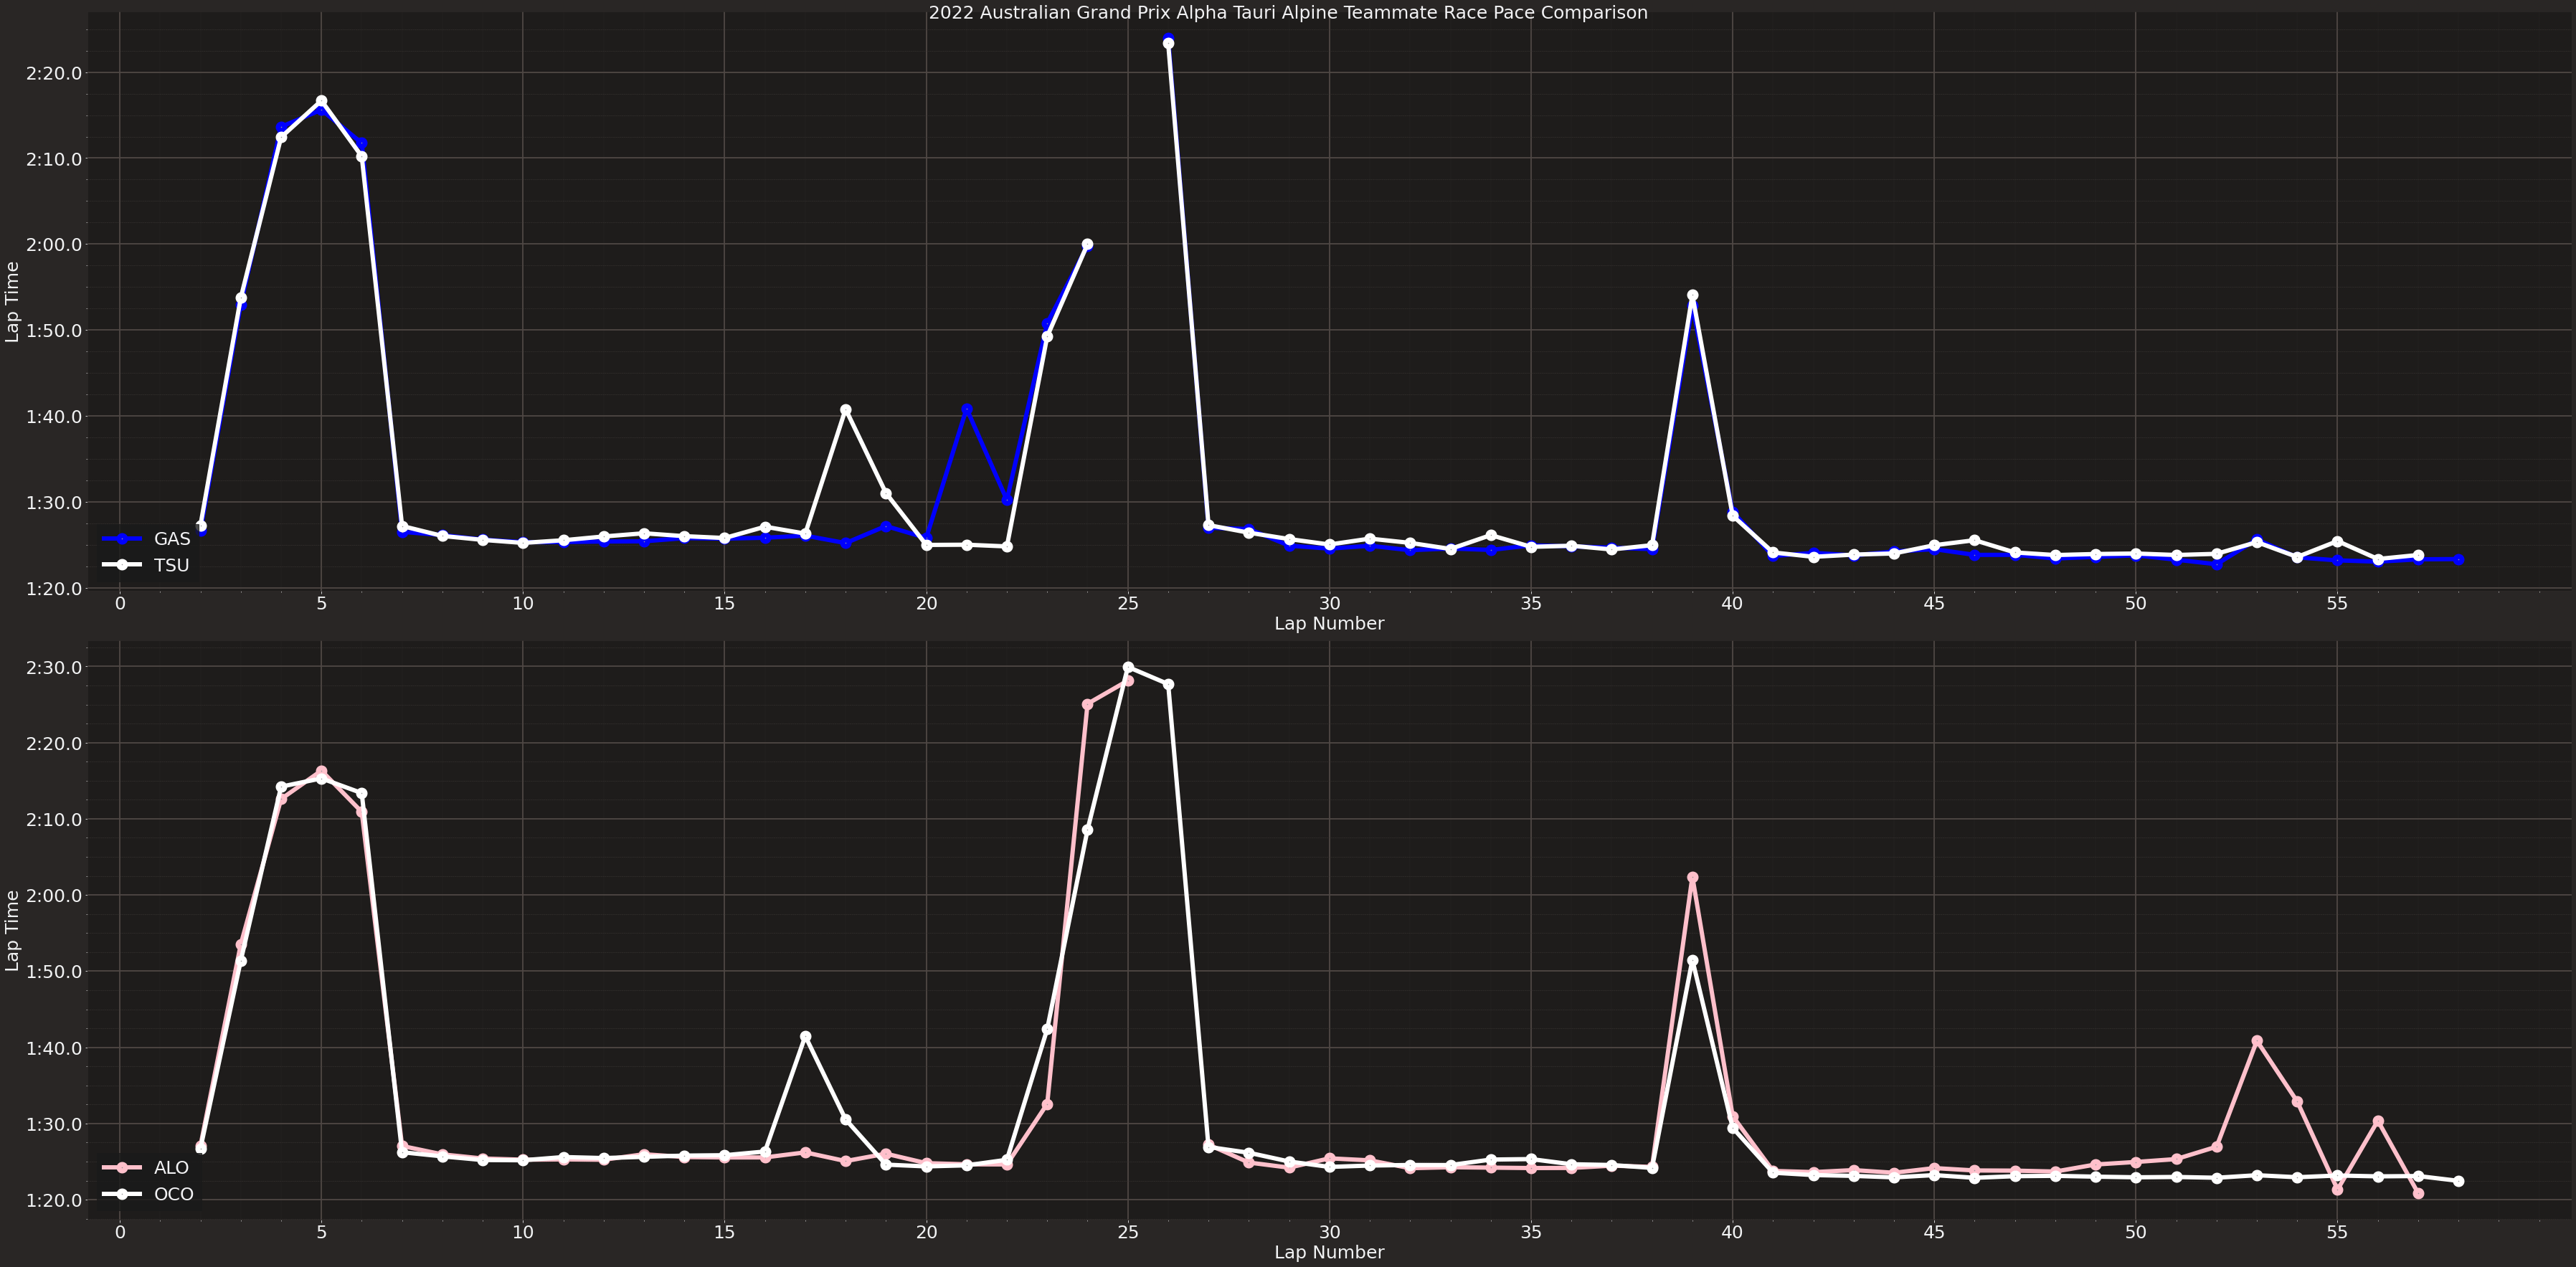

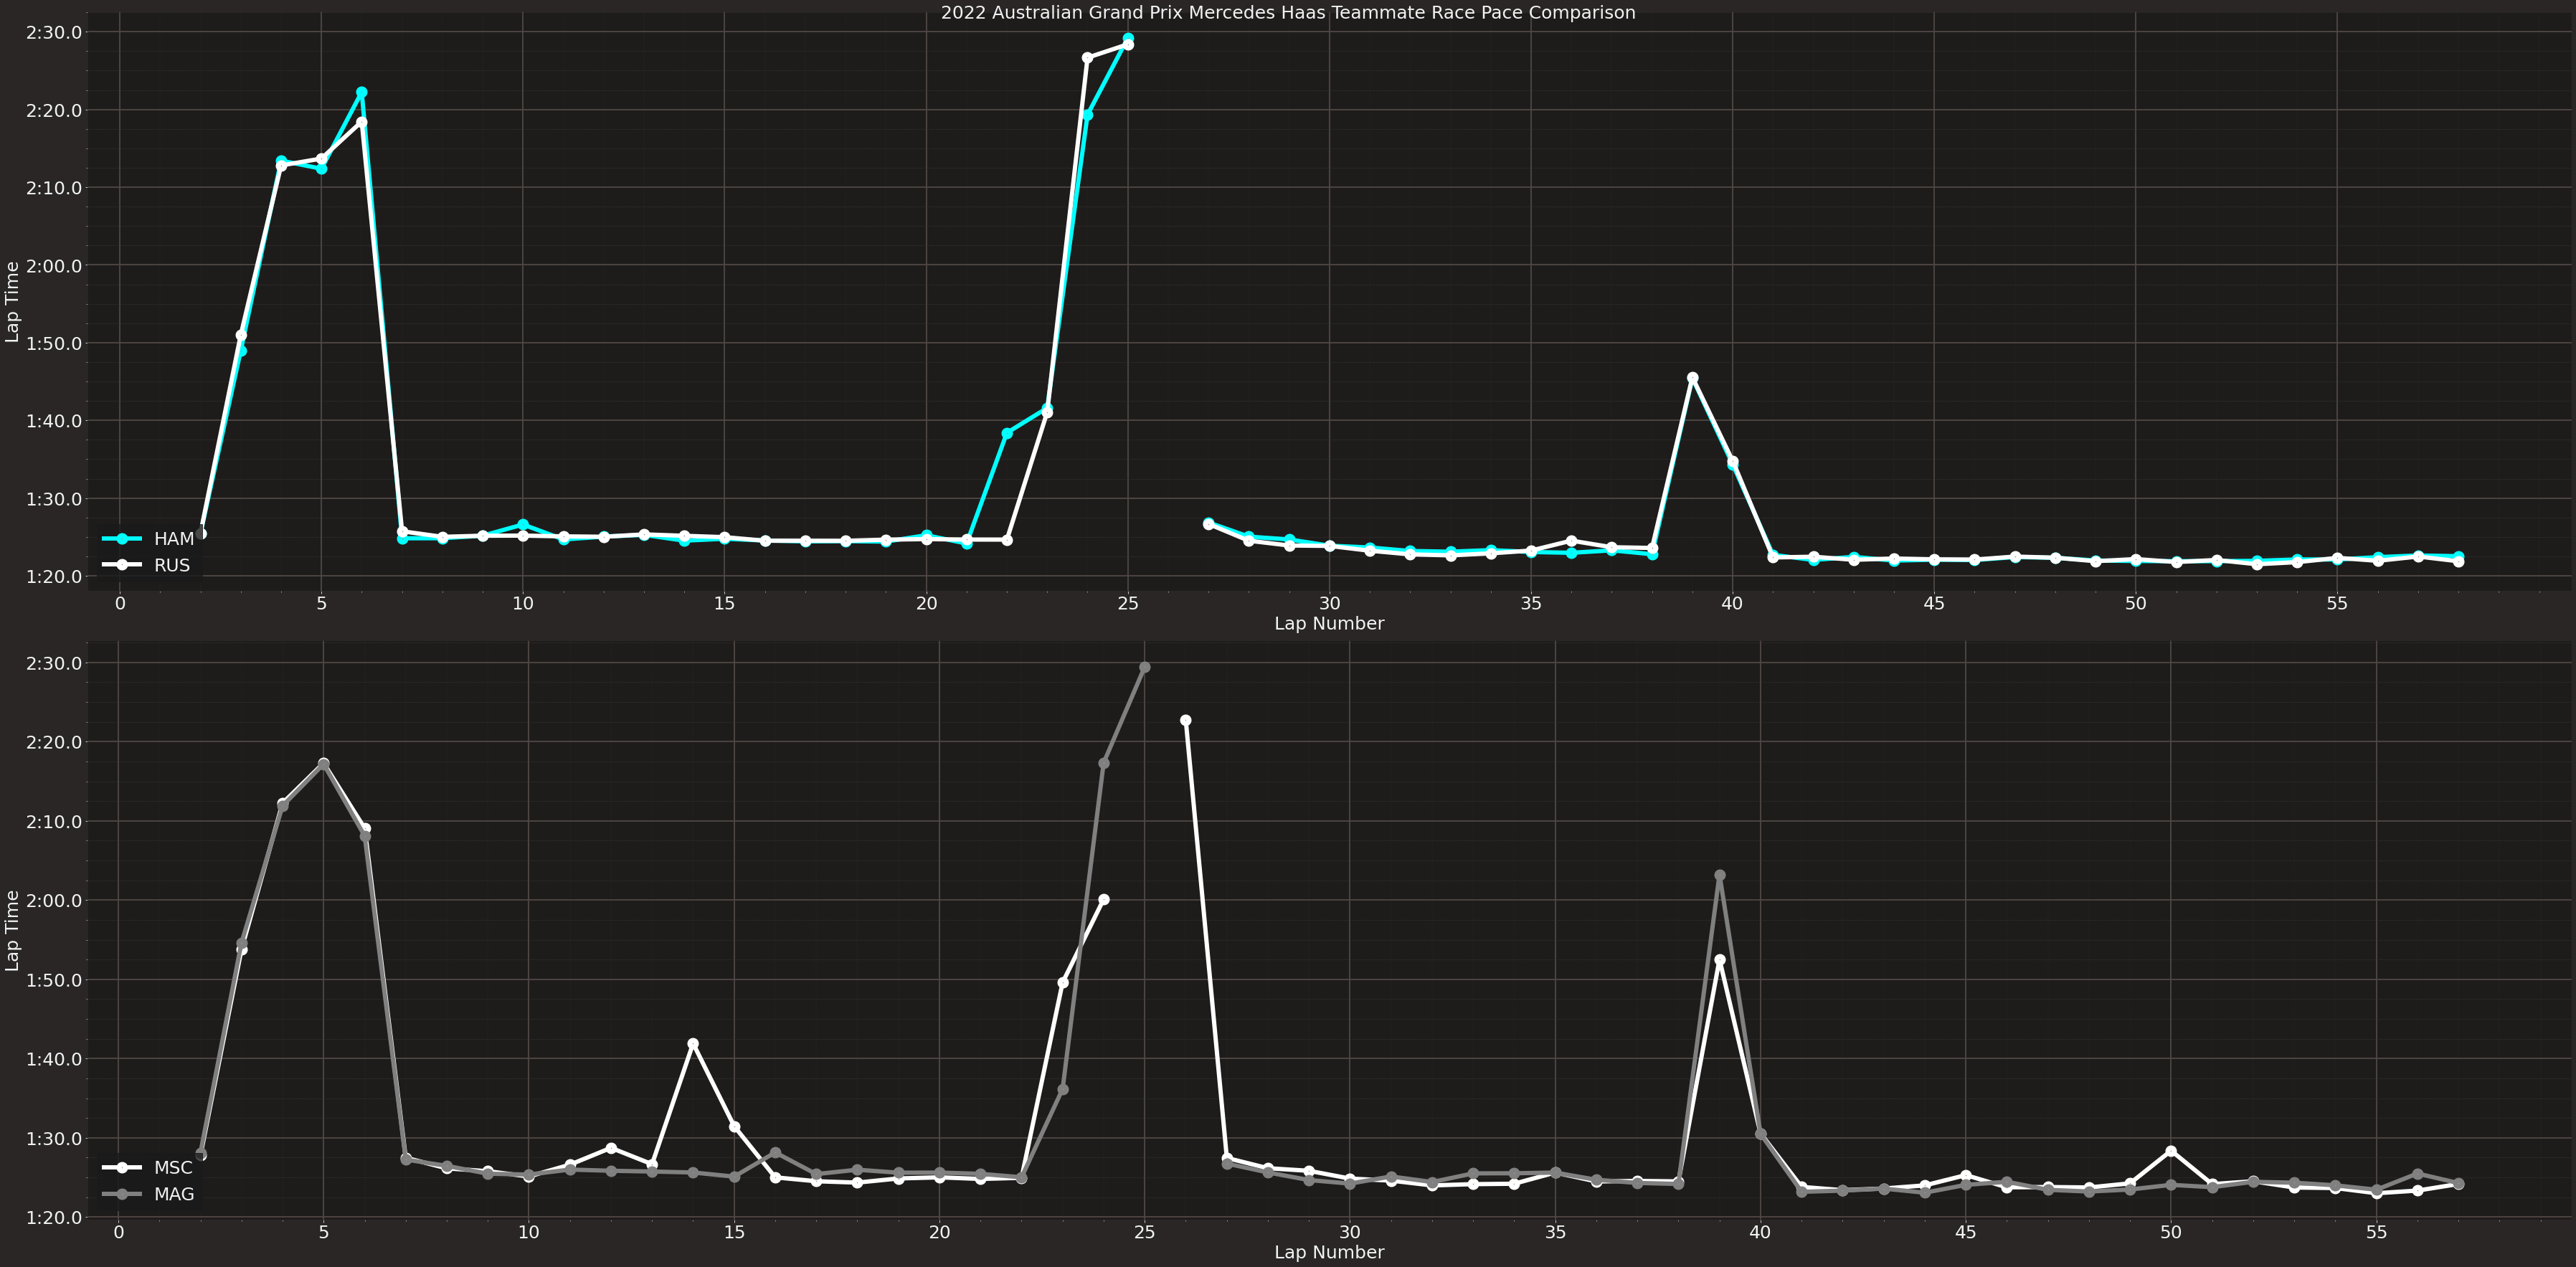

In [46]:
lecl=lapsr.pick_driver('LEC')
sain=lapsr.pick_driver('SAI')

ver=lapsr.pick_driver('VER')
per=lapsr.pick_driver('PER')

hami=lapsr.pick_driver('HAM')
russ=lapsr.pick_driver('RUS')

sain=lapsr.pick_driver('MAG')
lecl=lapsr.pick_driver('LEC')

bott=lapsr.pick_driver('BOT')
zhou=lapsr.pick_driver('ZHO')

norr=lapsr.pick_driver('NOR')
ricc=lapsr.pick_driver('RIC')

vett=lapsr.pick_driver('VET')
stro=lapsr.pick_driver('STR')

albo=lapsr.pick_driver('ALB')
lati=lapsr.pick_driver('LAT')

gasl=lapsr.pick_driver('GAS')
tsun=lapsr.pick_driver('TSU')

alon=lapsr.pick_driver('ALO')
ocon=lapsr.pick_driver('OCO')

schu=lapsr.pick_driver('MSC')
magn=lapsr.pick_driver('MAG')

fig, ax = plt.subplots(2, tight_layout=True)
plt.gcf().set_size_inches(50,25)
ax[0].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[0].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[0].set_xticks(range(0,60,5))
ax[0].plot(per['LapNumber'], per['LapTime'], label='PER', color='blue',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='blue', markeredgewidth=9)
ax[0].plot(ver['LapNumber'], ver['LapTime'], label='VER', color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[0].set_xlabel("Lap Number",fontsize=25)
ax[0].set_ylabel("Lap Time",fontsize=25)
ax[0].legend(loc="lower left",fontsize=25)
ax[1].set_xticks(range(0,60,5))
ax[1].plot(lecl['LapNumber'], lecl['LapTime'], label='LEC',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[1].plot(sain['LapNumber'], sain['LapTime'], label='SAI',color='red',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='red', markeredgewidth=9)
ax[1].set_xlabel("Lap Number",fontsize=25)
ax[1].set_ylabel("Lap Time",fontsize=25)
ax[1].legend(loc="lower left",fontsize=25)
ax[1].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[1].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
plt.suptitle(f"{year} {circuit} Ferrari RB Teammate Race Pace Comparison",fontsize=25)
plt.savefig(f"{year} {circuit} Ferrari RB Teammate Race Pace Comparison.jpeg",dpi=100)
plt.show()

fig, ax = plt.subplots(2, tight_layout=True)
plt.gcf().set_size_inches(50,25)
ax[0].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[0].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[0].set_xticks(range(0,60,5))
ax[0].plot(zhou['LapNumber'], zhou['LapTime'], label='ZHO',color='magenta',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='magenta', markeredgewidth=9)
ax[0].plot(bott['LapNumber'], bott['LapTime'], label='BOT',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[0].set_xlabel("Lap Number",fontsize=25)
ax[0].set_ylabel("Lap Time",fontsize=25)
ax[0].legend(loc="lower left",fontsize=25)
ax[1].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[1].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[1].set_xticks(range(0,60,5))
ax[1].plot(norr['LapNumber'], norr['LapTime'], label='NOR',color='orange',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='orange', markeredgewidth=9)
ax[1].plot(ricc['LapNumber'], ricc['LapTime'], label='RIC',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[1].set_xlabel("Lap Number",fontsize=25)
ax[1].set_ylabel("Lap Time",fontsize=25)
ax[1].legend(loc="lower left",fontsize=25)
plt.suptitle(f"{year} {circuit} Alfa Romeo McLaren Teammate Race Pace Comparison",fontsize=25)
plt.savefig(f"{year} {circuit} Alfa Romeo McLaren Teammate Race Pace Comparison.jpeg",dpi=100)
plt.show()

fig, ax = plt.subplots(2, tight_layout=True)
plt.gcf().set_size_inches(50,25)
ax[0].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[0].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[0].set_xticks(range(0,60,5))
ax[0].plot(vett['LapNumber'], vett['LapTime'], label='VET',color='green',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='green', markeredgewidth=9)
ax[0].plot(stro['LapNumber'], stro['LapTime'], label='STR',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[0].set_xlabel("Lap Number",fontsize=25)
ax[0].set_ylabel("Lap Time",fontsize=25)
ax[0].legend(loc="lower left",fontsize=25)
ax[1].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[1].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[1].set_xticks(range(0,60,5))
ax[1].plot(albo['LapNumber'], albo['LapTime'], label='ALB',color='blue',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='blue', markeredgewidth=9)
ax[1].plot(lati['LapNumber'], lati['LapTime'], label='LAT',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[1].set_xlabel("Lap Number",fontsize=25)
ax[1].set_ylabel("Lap Time",fontsize=25)
ax[1].legend(loc="lower left",fontsize=25)
plt.suptitle(f"{year} {circuit} Aston Martin Williams Teammate Race Pace Comparison",fontsize=25)
plt.savefig(f"{year} {circuit} Aston Martin Williams Teammate Race Pace Comparison.jpeg",dpi=100)
plt.show()

fig, ax = plt.subplots(2, tight_layout=True)
plt.gcf().set_size_inches(50,25)
ax[0].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[0].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[0].set_xticks(range(0,60,5))
ax[0].plot(gasl['LapNumber'], gasl['LapTime'], label='GAS',color='blue',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='blue', markeredgewidth=9)
ax[0].plot(tsun['LapNumber'], tsun['LapTime'], label='TSU',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[0].set_xlabel("Lap Number",fontsize=25)
ax[0].set_ylabel("Lap Time",fontsize=25)
ax[0].legend(loc="lower left",fontsize=25)
ax[1].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[1].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[1].set_xticks(range(0,60,5))
ax[1].plot(alon['LapNumber'], alon['LapTime'], label='ALO',color='pink',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='pink', markeredgewidth=9)
ax[1].plot(ocon['LapNumber'], ocon['LapTime'], label='OCO',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[1].set_xlabel("Lap Number",fontsize=25)
ax[1].set_ylabel("Lap Time",fontsize=25)
ax[1].legend(loc="lower left",fontsize=25)
plt.suptitle(f"{year} {circuit} Alpha Tauri Alpine Teammate Race Pace Comparison",fontsize=25)
plt.savefig(f"{year} {circuit} Alpha Tauri Alpine Teammate Race Pace Comparison.jpeg",dpi=100)
plt.show()

fig, ax = plt.subplots(2, tight_layout=True)
plt.gcf().set_size_inches(50,25)
ax[0].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[0].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[0].set_xticks(range(0,60,5))
ax[0].plot(hami['LapNumber'], hami['LapTime'], label='HAM',color='cyan',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='cyan', markeredgewidth=9)
ax[0].plot(russ['LapNumber'], russ['LapTime'], label='RUS',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[0].set_xlabel("Lap Number",fontsize=25)
ax[0].set_ylabel("Lap Time",fontsize=25)
ax[0].legend(loc="lower left",fontsize=25)
ax[1].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[1].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[1].set_xticks(range(0,60,5))
ax[1].plot(schu['LapNumber'], schu['LapTime'], label='MSC',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[1].plot(magn['LapNumber'], magn['LapTime'], label='MAG',color='grey',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='grey', markeredgewidth=9)
ax[1].set_xlabel("Lap Number",fontsize=25)
ax[1].set_ylabel("Lap Time",fontsize=25)
ax[1].legend(loc="lower left",fontsize=25)
plt.suptitle(f"{year} {circuit} Mercedes Haas Teammate Race Pace Comparison",fontsize=25)
plt.savefig(f"{year} {circuit} Mercedes Haas Teammate Race Pace Comparison.jpeg",dpi=100)
plt.show()

### Race Finishing Time Difference Between Teammates

In [47]:
# #Getting total time on track of the drivers in seconds
# lapsr['TimeSeconds']=lapsr['Time'].dt.total_seconds()
# per=lapsr.pick_driver('PER')
# per=per.loc[per['TimeSeconds'] == max(per['TimeSeconds'].dropna())]

# ver=lapsr.pick_driver('VER')
# ver=ver.loc[ver['TimeSeconds'] == max(ver['TimeSeconds'].dropna())]

# merge1=pd.merge(per,ver,how='outer')
# rf1 = Laps(merge1).sort_values(by='TimeSeconds').reset_index(drop=True)
# # print(rf1.dropna(axis=1))

# hami=lapsr.pick_driver('HAM')
# hami=hami.loc[hami['TimeSeconds'] == max(hami['TimeSeconds'].dropna())]

# russ=lapsr.pick_driver('RUS')
# russ=russ.loc[russ['TimeSeconds'] == max(russ['TimeSeconds'].dropna())]

# merge2=pd.merge(hami,russ,how='outer')
# rf2=Laps(merge2).sort_values(by='TimeSeconds').reset_index(drop=True)
# # print(rf2.dropna(axis=1))
# schu=lapsr.pick_driver('MSC')
# schu=schu.loc[schu['TimeSeconds'] == max(schu['TimeSeconds'].dropna(),default=0)]

# magn=lapsr.pick_driver('MAG')
# magn=magn.loc[magn['TimeSeconds'] == max(magn['TimeSeconds'].dropna())]

# merge3=pd.merge(schu,magn,how='outer')
# rf3=Laps(merge3).sort_values(by='TimeSeconds').reset_index(drop=True)
# # print(rf3.dropna(axis=1))


In [48]:
# b1=rf1.loc[rf1['TimeSeconds']==min(rf1['TimeSeconds'])]
# best1=float(b1.TimeSeconds)
# rf1['RaceTimeDiff']=rf1['TimeSeconds']-best1
# # print(rf1[['Driver', 'TimeSeconds', 'RaceTimeDiff']])

# b2=rf2.loc[rf2['TimeSeconds']==min(rf2['TimeSeconds'])]
# best2=float(b2.TimeSeconds)
# rf2['RaceTimeDiff']=rf2['TimeSeconds']-best2
# # print(rf2[['Driver', 'TimeSeconds', 'RaceTimeDiff']])

# b3=rf3.loc[rf3['TimeSeconds']==min(rf3['TimeSeconds'])]
# best3=float(b3.TimeSeconds)
# rf3['RaceTimeDiff']=rf3['TimeSeconds']-best3
# # print(rf3[['Driver', 'TimeSeconds', 'RaceTimeDiff']])

In [49]:
# tcol1 = list()
# for index, lap in rf1.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol1.append(color)

# tcol2 = list()
# for index, lap in rf2.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol2.append(color)
    
# tcol3 = list()
# for index, lap in rf3.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol3.append(color)

In [50]:
# fig, ax = plt.subplots(3,tight_layout=True)

# plt.gcf().set_size_inches(16.0,10.8)

# ax[0].barh(rf1.index, rf1['RaceTimeDiff'],color=tcol1, edgecolor='white')
# ax[0].set_yticks(rf1.index)
# ax[0].set_yticklabels(rf1['Driver'])
# ax[0].invert_yaxis()
# ax[0].set_axisbelow(True)
# ax[0].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)

# ax[1].barh(rf2.index, rf2['RaceTimeDiff'],color=tcol2, edgecolor='white')
# ax[1].set_yticks(rf2.index)
# ax[1].set_yticklabels(rf2['Driver'])
# ax[1].invert_yaxis()
# ax[1].set_axisbelow(True)
# ax[1].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)

# ax[2].barh(rf3.index, rf3['RaceTimeDiff'],color=tcol3, edgecolor='white')
# ax[2].set_yticks(rf3.index)
# ax[2].set_yticklabels(rf3['Driver'])
# ax[2].invert_yaxis()
# ax[2].set_axisbelow(True)
# ax[2].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
# plt.suptitle(f"{year} {circuit} Race Finish Time Difference (Seconds)")


# plt.savefig(f"{year} {circuit} Race Finish Time Difference.jpeg", dpi=100)

# plt.show()

### Race Finish Time Comparison - All Drivers

In [51]:
#Find first place's minimum race time and subtract that from other driver's times.

In [52]:
drvr = pd.unique(lapsr['Driver'])
drvr=np.array(drvr)
drvr
index=17,18,19
drvr= np.delete(drvr, index)
drvr

array(['LEC', 'PER', 'RUS', 'HAM', 'NOR', 'RIC', 'OCO', 'BOT', 'GAS',
       'ALB', 'ZHO', 'STR', 'MSC', 'MAG', 'TSU', 'LAT', 'ALO'],
      dtype=object)

In [53]:
#Converting Race Time into seconds for later.
race.laps['TimeSeconds']=race.laps['Time'].dt.total_seconds()
# race.laps

In [54]:
#Calculating each driver's race time in seconds (TimeSeconds) and sorting the new list with Drivers and those time values
rf=pd.DataFrame([],columns=lapsr.columns)
for d in drvr:
    d=race.laps.pick_driver(d)
    rfilt=(d['TimeSeconds'] == max(d['TimeSeconds'].dropna()))
    e=d.loc[rfilt]
    rf=rf.append(e)
# print(rf.info())
rf['RaceTimeDiff']=rf['TimeSeconds']-(min(rf['TimeSeconds']))
final=rf[['TimeSeconds','RaceTimeDiff','Driver']]
abcde=list(range(0,17))

final=final.sort_values(by='TimeSeconds')
final['index']=abcde
final=final.set_index('index')
final['Index2']=abcde
final
# final.reset_index(drop=True)
# final['index']=abcde
# final=final.set_index('index')

fastestfil=(final['TimeSeconds']==min(final['TimeSeconds']))
fastestmv=final.loc[fastestfil,['Driver','TimeSeconds','Index2']]
fastestmv=fastestmv.set_index('Index2')
fastestmv

,Driver,TimeSeconds
Index2,,
0,LEC,9000.229


In [55]:
tcol = list({'ALB': '#005aff', 'SAI': '#ff8181', 'LEC': '#dc0000', 'RIC': '#ff8700',
             'OCO': '#70c2ff', 'ALO': '#0090ff', 'RUS': '#24ffff', 'MAG': '#ffffff',
             'STR': '#25a617', 'NOR': '#eeb370', 'HAM': '#00d2be', 'VER': '#0600ef',
             'MSC': '#cacaca', 'LAT': '#012564', 'HUL': '#2f9b90', 'GAS': '#2b4562', 
             'VET': '#006f62', 'PER': '#716de2', 'BOT': '#900000', 'TSU': '#356cac',
             'ZHO': '#500000'})

In [56]:
my_colors=['#0600ef','#716de2','#eeb370','#24ffff','#900000','#dc0000','#356cac',
           '#006f62','#ffffff','#25a617','#005aff','#2b4562']

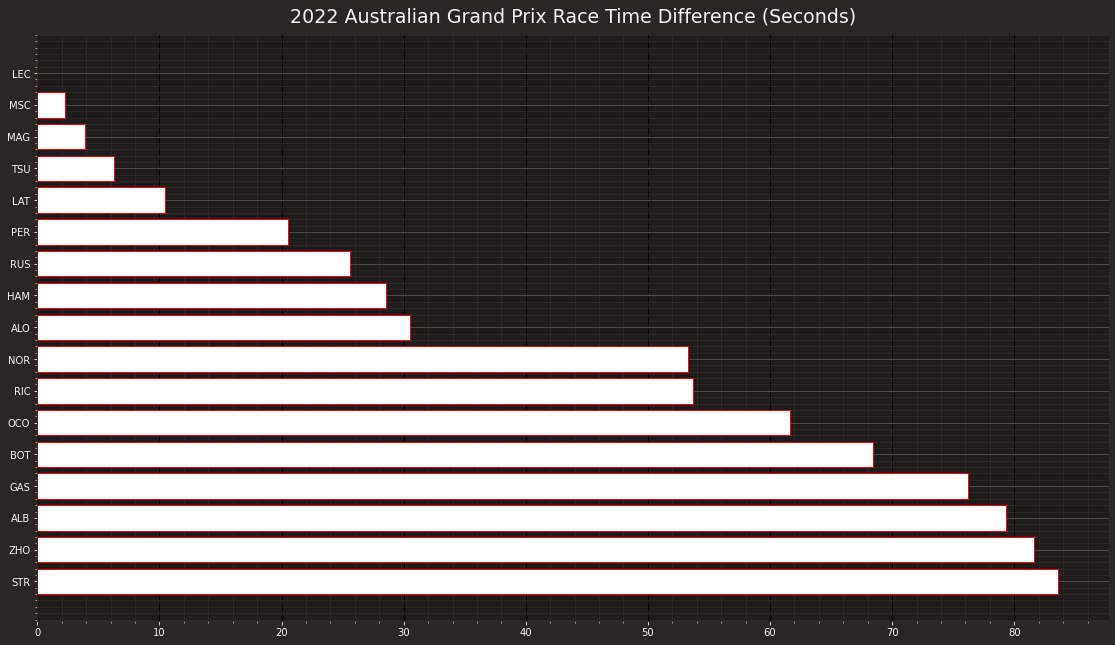

In [57]:
#Plotting
fig, ax = plt.subplots()
plt.gcf().set_size_inches(19.2,10.8)
ax.barh(final.index, final['RaceTimeDiff'],color='w', edgecolor='red')
ax.set_yticks(final.index)
ax.set_yticklabels(final['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='-.', color='black', zorder=-1000)
plt.title(f"{year} {circuit} Race Time Difference (Seconds)")
plt.savefig(f"{year} {circuit} Race Time Difference.png", dpi=100)

plt.show()

### Tyre Strategy Analysis

In [58]:
driver_stints = lapsr[['Driver', 'Stint', 'Compound', 'LapNumber','DriverNumber']].groupby(
                    ['Driver', 'Stint', 'Compound','DriverNumber']
                    ).count().reset_index()
driver_stints = driver_stints.rename(columns={'LapNumber': 'StintLength'})
driver_stints = driver_stints.sort_values(by=['Stint'])

compound_colors = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFF200',
    'HARD': '#EBEBEB',
    'INTERMEDIATE': '#39B54A',
    'WET': '#00AEEF',
    'UNKNOWN':'#FFC0CB'
}
# driver_stints

In [59]:
ts=pd.DataFrame(race.results)
cdict={'Position':int}
ts=ts.astype(cdict)
ts=ts.set_index('Position',drop=True)
# ts

In [60]:
ts2=pd.merge(ts,driver_stints,on='DriverNumber',how='outer')
# ts2

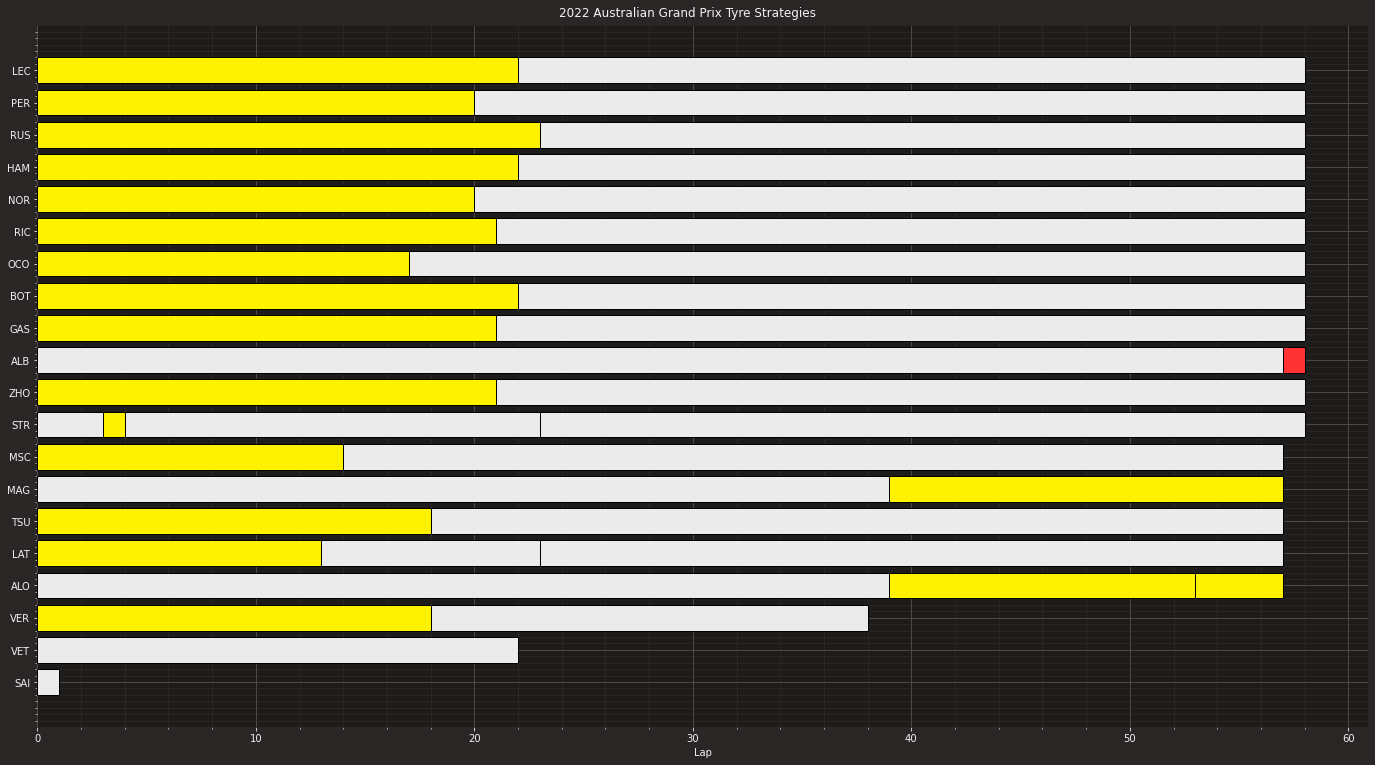

In [61]:

# plt.rcParams["figure.figsize"] = [15, 10]
# plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(tight_layout=True)
plt.gcf().set_size_inches(19.2,10.8)
for a in ts2['Abbreviation']:
    stints = driver_stints.loc[driver_stints['Driver'] == a]
    previous_stint_end = 0
    for _, stint in stints.iterrows():
        plt.barh(
            a, 
            stint['StintLength'], 
            left=previous_stint_end, 
            color=compound_colors[stint['Compound']], 
            edgecolor = "black"
        )
        previous_stint_end = previous_stint_end + stint['StintLength']
plt.suptitle(f"{year} {circuit} Tyre Strategies")
plt.xlabel('Lap')
# plt.text(65,10,'Green = Inter \n White = Hard \n Yellow = Medium \n Red = Soft')
plt.gca().invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig(f'{year} {circuit} Tyre Strategies.jpeg', dpi=100)
plt.show()

## Which driver ran the most laps on a single tyre? 

In [62]:
f=(lapsr['TyreLife'] == max(lapsr['TyreLife'].dropna()))
tl_king=lapsr.loc[f,['Driver','Team','TyreLife','Compound']]
tl_king

,Driver,Team,TyreLife,Compound
578,ALB,Williams,57.0,HARD


## Time Ahead & Time Behind on a Single Lap

In [63]:
#Let's compare the two fastest laps in the race - Leclerc and Alonso.
alo = lapsr.pick_driver('ALO').pick_fastest()
lec = lapsr.pick_driver('LEC').pick_fastest()
print(f"Alonso's fastest lap was a {alo['LapTime']}, while Leclerc's fastest lap was a {lec['LapTime']}. \n Leclerc was on {lec['Compound']}, and Alonso on {alo['Compound']}.\n The Monegasque did his fastest lap on lap {lec['LapNumber']}, while the Spaniard did his on lap {alo['LapNumber']}.")

Alonso's fastest lap was a 0 days 00:01:20.846000, while Leclerc's fastest lap was a 0 days 00:01:20.260000. 
 Leclerc was on HARD, and Alonso on MEDIUM.
 The Monegasque did his fastest lap on lap 58, while the Spaniard did his on lap 57.


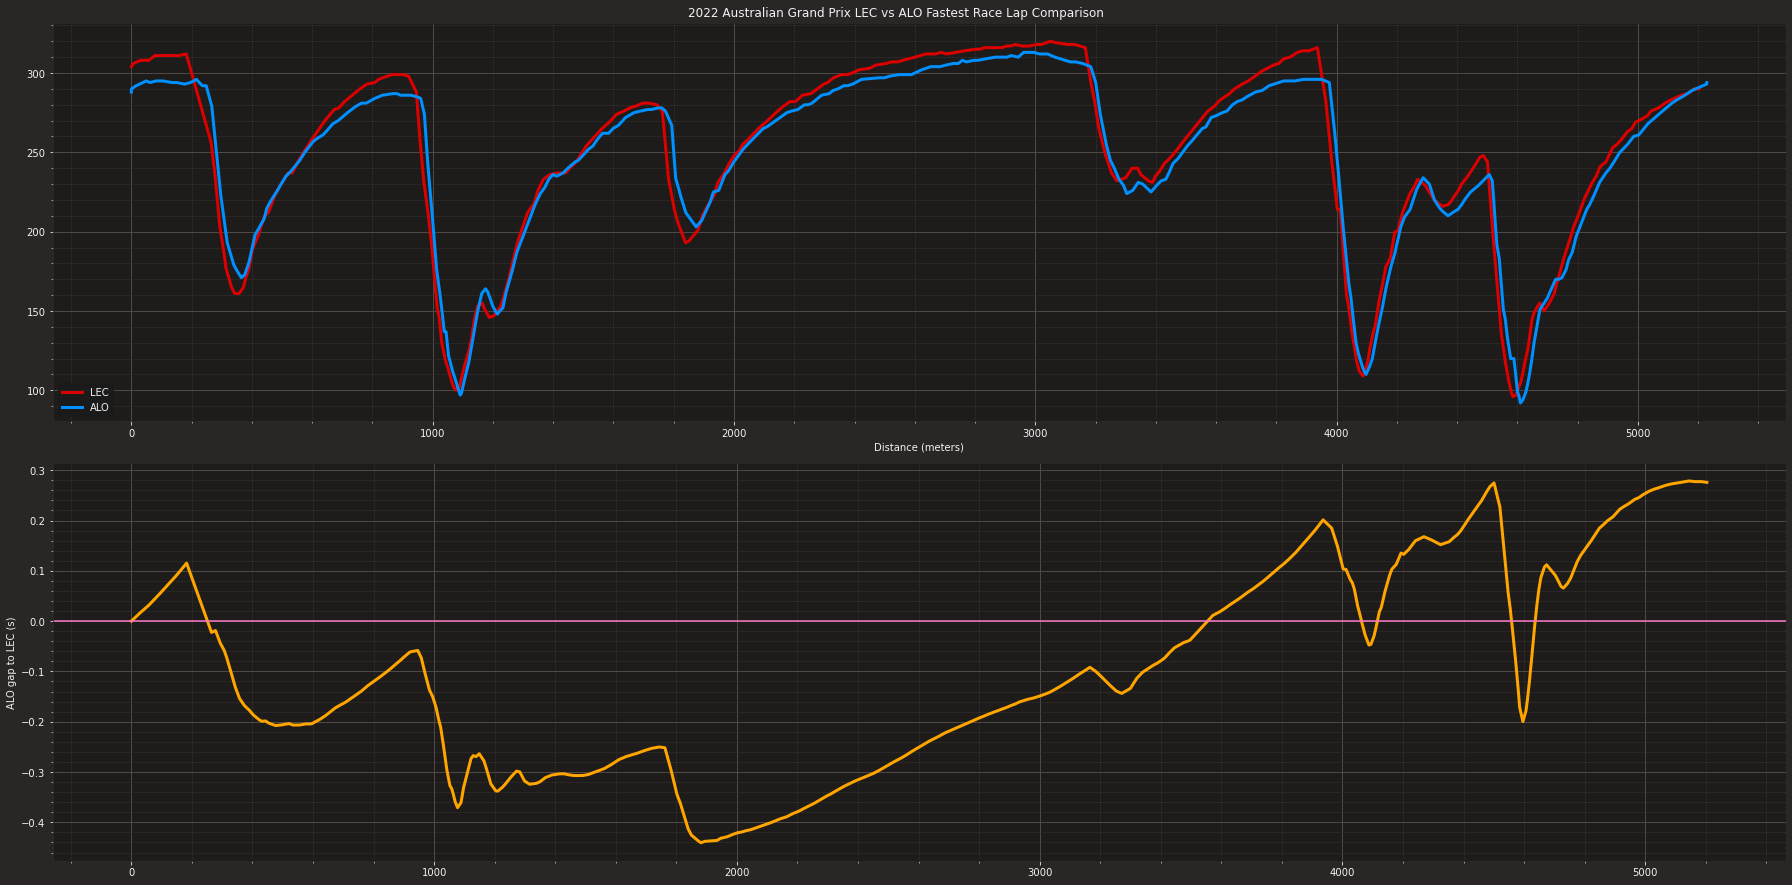

In [64]:
alo = lapsr.pick_driver('ALO').pick_fastest()
lec = lapsr.pick_driver('LEC').pick_fastest()
ver = lapsr.pick_driver('VER').pick_fastest()
delta_time, ref_tel, compare_tel = utils.delta_time(lec, alo)

fig, ax = plt.subplots(2,tight_layout=True)
plt.gcf().set_size_inches(25,12.5)
ax[0].plot(ref_tel['Distance'], ref_tel['Speed'], label='LEC',color=plotting.team_color(lec['Team']),lw=3)
ax[0].plot(compare_tel['Distance'], compare_tel['Speed'], label='ALO', color=plotting.team_color(alo['Team']),lw=3)
ax[0].set(xlabel='Distance (meters)')
ax[0].legend(loc='lower left')

ax[1].plot(ref_tel['Distance'], delta_time, ls='-',color='orange', lw=3)
ax[1].axhline(0)
ax[1].set(ylabel=f"{alo['Driver']} gap to {lec['Driver']} (s)")

plt.suptitle(f"{year} {circuit} {lec['Driver']} vs {alo['Driver']} Fastest Race Lap Comparison")
plt.savefig(f"{year} {circuit} {lec['Driver']} vs {alo['Driver']} Fastest Race Lap Comparison.jpeg", dpi=100)
plt.show()